## DPS Chapter 6: Trees and Tree Algorithms

This notebook references these specific sections:

Ch 6 "Trees and Tree Algorithms" in Data Structures in Python (DSP):

https://runestone.academy/ns/books/published/pythonds3/Trees/toctree.html?mode=browsing

This notebook by:

***Eric V. Level***  

Graduate Programs in Software Engineering and Data Science  
University of St Thomas
St Paul, MN

Includes material from our primary online site...:

- ***Problem Solving with Algorithms and Data Structures using Python***   
by Brad Miller and David Ranum  
Luther College 
(DSP for short)

https://runestone.academy/ns/books/published/pythonds3/index.html?mode=browsing

...along with material from this secondary source.

- ***How to Think Like a Computer Scientist in Python"***   
by Brad Miller and David Ranum  
Luther College 
(HTT for short)

https://runestone.academy/ns/books/published/thinkcspy/index.html#

### DSP-6.1 - Chapter Objectives

- To understand what a tree data structure is and how it is used.

- To see how trees can be used to implement a map data structure.

- To implement trees using a list.

- To implement trees using classes and references.

- To implement trees as a recursive data structure.

- To implement a priority queue using a heap.

### 6.2 - Examples of Trees

Now that we have studied linear data structures like stacks and queues and have some experience with recursion, we will look at a common data structure called the ***tree***. Trees are used in many areas of computer science, including operating systems, graphics, database systems, and computer networking. Tree data structures have many things in common with their botanical cousins. A tree data structure has a root, branches, and leaves. The difference between a tree in nature and a tree in computer science is that a tree data structure has its root at the top and its leaves on the bottom.

Before we begin our study of tree data structures, let’s look at a few common examples. Our first example of a tree is a classification tree from biology. Figure 1 shows an example of the biological classification of some animals. From this simple example, we can learn about several properties of trees. The first property this example demonstrates is that trees are hierarchical. By hierarchical, we mean that trees are structured in layers with the more general things near the top and the more specific things near the bottom. The top of the hierarchy is the kingdom, the next layer of the tree (the “children” of the layer above) is the phylum, then the class, and so on. However, no matter how deep we go in the classification tree, all the organisms are still animals.

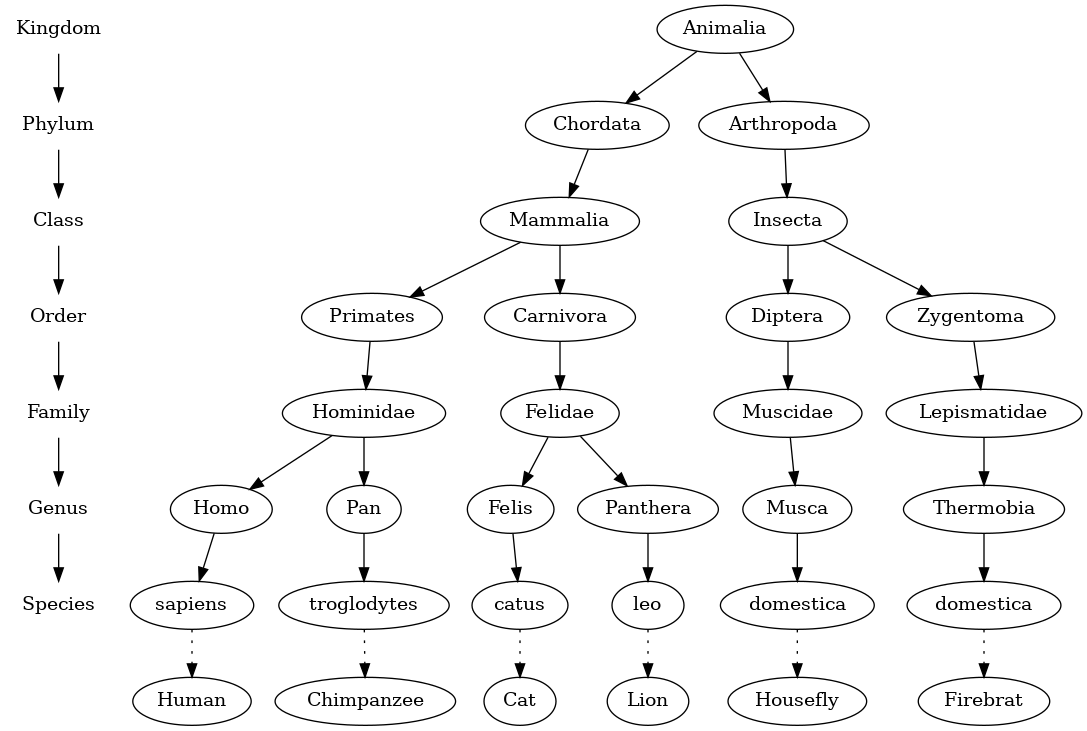

***Figure 1: Taxonomy of Some Common Animals Shown as a Tree***

Notice that you can start at the top of the tree and follow a path made of circles and arrows all the way to the bottom. At each level of the tree we might ask ourselves a question and then follow the path that agrees with our answer. For example we might ask, “Is this animal a chordate or an arthropod?” If the answer is “chordate,” then we follow that path and ask, “Is this chordate a mammal?” If not, we are stuck (but only in this simplified example). When we are at the mammal level we ask, “Is this mammal a primate or a carnivore?” We can keep following paths until we get to the very bottom of the tree where we have the common name.

A second property of trees is that all of the children of one node are independent of the children of another node. For example, the genus `Thermobia` has a children domestica. The genus `Musca` also has a child named `domestica`, but it is a different node and is independent of the `domestica` child of `Thermobia`. This means that we can change the node that is the child of `Musca` without affecting the child of `Thermobia`.

A third property is that each leaf node is unique. We can specify a path from the root of the tree to a leaf that uniquely identifies each species in the animal kingdom, for example `Animalia->Chordata->Mammalia->Carnivora->Felidae->Felis->catus`.

Another example of a tree structure that you probably use every day is a file system. In a file system, directories, or folders, are structured as a tree. Figure 2 illustrates a small part of a Unix file system hierarchy.

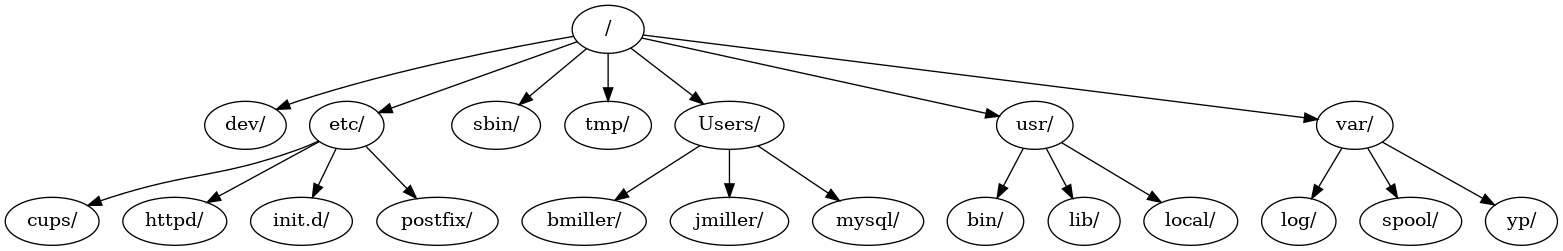

***Figure 2: A Small Part of the Unix File System Hierarchy***

Like the biological classification tree, the file system tree enables you to follow a path from the root to any directory. That path will uniquely identify that subdirectory (and all the files in it). Another important property of trees, derived from their hierarchical nature, is that you can move entire sections of a tree (called a ***subtree***) to a different position in the tree without affecting the lower levels of the hierarchy. For example, we could take the entire subtree staring with `/etc/`, detach `etc/` from the root and reattach it under `usr/`. This would change the unique pathname to httpd from `/etc/httpd` to `/usr/etc/httpd`, but would not affect the contents or any children of the `httpd` directory.

A final example of a tree is a web page. The code that precedes Figure 3 is an example of a simple web page using HTML; Figure 3 shows the tree that corresponds to each of the HTML tags used to create the page.

```
<html lang="en">
<head>
    <meta charset=utf-8" />
    <title>simple</title>
</head>
<body>
<h1>A simple web page</h1>
<ul>
    <li>List item one</li>
    <li>List item two</li>
</ul>
<h2><a href="https://www.luther.edu">Luther College</a><h2>
</body>
</html>
```

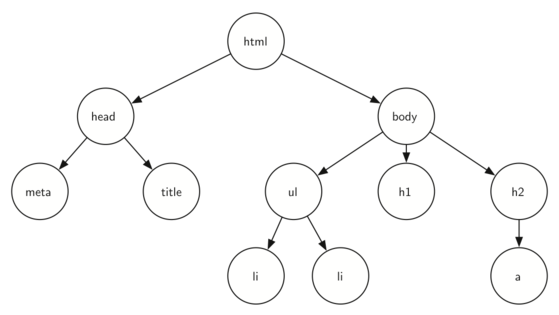

***Figure 3: A Tree Corresponding to the Markup Elements of a Web Page***

The HTML source code and the tree accompanying the source illustrate another hierarchy. Notice that each level of the tree corresponds to a level of nesting inside the HTML tags. The first tag in the source is `<html>` and the last is `</html>`. All the rest of the tags in the page are inside the pair. If you check, you will see that this nesting property is true at all levels of the tree.

### 6.3 - Vocabulary and Definitions

Now that we have looked at examples of trees, we will formally define a tree and its components.

**Node**

A **node** is a fundamental part of a tree. It can have a name, which we call the **key**. A node may also have additional information. We call this additional information the **value** or payload. While the payload information is not central to many tree algorithms, it is often critical in applications that make use of trees.

**Edge**

An **edge** is another fundamental part of a tree. An edge connects two nodes to show that there is a relationship between them. Every node (except the root) is connected by exactly one incoming edge from another node. Each node may have several outgoing edges.

**Root**

The **root** of the tree is the only node in the tree that has no incoming edges. In Figure 2, `/` is the root of the tree.

**Path**

A **path** is an ordered list of nodes that are connected by edges, for example, `Mammalia`->`Carnivora`->`Felidae`->`Felis`->`catus` is a path.

**Children**

The set of nodes that have incoming edges from the same node are said to be the **children** of that node. In Figure 2, nodes `log/`, `spool/`, and `yp/` are the children of node `var/`.

**Parent**

A node is the **parent** of all the nodes it connects to with outgoing edges. In Figure 2 the node `var/` is the parent of nodes `log/`, `spool/`, and `yp/`.

**Sibling**

Nodes in the tree that are children of the same parent are said to be **siblings**. The nodes `etc/` and `usr/` are siblings in the file system tree.

**Subtree**

A **subtree** is a set of nodes and edges comprised of a parent and all the descendants of that parent.

**Leaf Node**

A **leaf node** is a node that has no children. For example, `Human` and `Chimpanzee` are leaf nodes in Figure 1.

**Level**

The **level** of a node `n` is the number of edges on the path from the root node to `n`. For example, the level of the `Felis` node in Figure 1 is five. By definition, the level of the root node is zero.

**Height**

The **height** of a tree is equal to the maximum level of any node in the tree. The height of the tree in Figure 2 is two.

With the basic vocabulary now defined, we can move on to a formal definition of a tree. In fact, we will provide two definitions of a tree. One definition involves nodes and edges. The second definition, which will prove to be very useful, is a recursive definition.

***Definition One***: A tree consists of a set of nodes and a set of edges that connect pairs of nodes. A tree has the following properties:

- One node of the tree is designated as the root node.

- Every node `n`, except the root node, is connected by an edge from exactly one other node `p`, where `p` is the parent of `n`.

- A unique path traverses from the root to each node.

- If each node in the tree has a maximum of two children, we say that the tree is a binary tree.

Figure 3 illustrates a tree that fits definition one. The arrowheads on the edges indicate the direction of the connection.

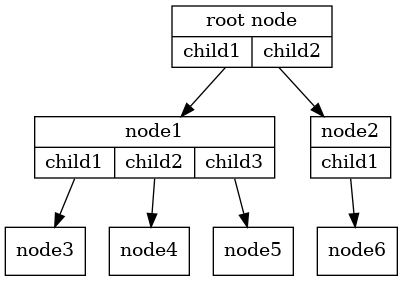

***Figure 3: A Tree Consisting of a Set of Nodes and Edges***

***Definition Two***: A tree is either empty or consists of a root and zero or more subtrees, each of which is also a tree. The root of each subtree is connected to the root of the parent tree by an edge. Figure 4 illustrates this recursive definition of a tree. Using the recursive definition of a tree, we know that the tree in Figure 4 has at least four nodes since each of the triangles representing a subtree must have a root. It may have many more nodes than that, but we do not know unless we look deeper into the tree.


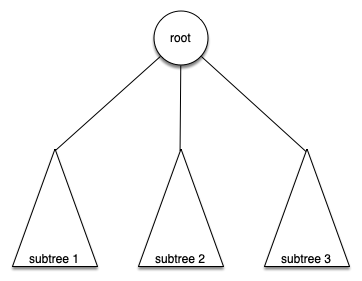

***Figure 4: A Recursive Definition of a Tree***

### 6.4 - Implementation

Keeping in mind the definitions from the previous section, we can use the following functions to create and manipulate a binary tree:

- `BinaryTree()` creates a new instance of a binary tree.

- `get_root_val()` returns the object stored in the current node.

- `set_root_val(val)` stores the object in parameter `val` in the current node.

- `get_left_child()` returns the binary tree corresponding to the left child of the current node.

- `get_right_child()` returns the binary tree corresponding to the right child of the current node.

- `insert_left(val)` creates a new binary tree and installs it as the left child of the current node.

- `insert_right(val)` creates a new binary tree and installs it as the right child of the current node.

The key decision in implementing a tree is choosing a good internal storage technique. Python allows us two very interesting possibilities, and we will examine both before choosing one. We call them ***list of lists*** and ***nodes and references***.

### 6.5 - List of Lists Representation

In a tree represented by a list of lists, we will begin with Python’s list data structure and write the functions defined above. Although writing the interface as a set of operations on a list is a bit different from the other abstract data types we have implemented, it is interesting to do so because it provides us with a simple recursive data structure that we can look at and examine directly. In a list of lists tree, we will store the value of the root node as the first element of the list. The second element of the list will itself be a list that represents the left subtree. The third element of the list will be another list that represents the right subtree. To illustrate this storage technique, let’s look at an example. Figure 1 shows a simple tree and the corresponding list implementation.

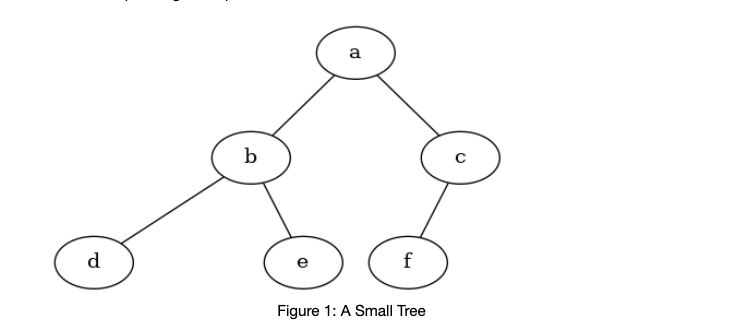

In [1]:
my_tree = [
    "a",  # root
        ["b",  # left subtree
            ["d", [], []],
            ["e", [], []]
        ],
        ["c",  # right subtree
            ["f", [], []],
            []
        ],
    ]

Notice that we can access subtrees of the list using standard list indexing. The root of the tree is `my_tree[0]`, the left subtree of the root is `my_tree[1]`, and the right subtree is `my_tree[2]`. ActiveCode 1 illustrates creating a simple tree using a list. Once the tree is constructed, we can access the root and the left and right subtrees. One very nice property of this list of lists approach is that the structure of a list representing a subtree adheres to the structure defined for a tree; the structure itself is recursive! A subtree that has a root value and two empty lists is a leaf node. Another nice feature of the list of lists approach is that it generalizes to a tree that has many subtrees. In the case where the tree is more than a binary tree, another subtree is just another list.

In [2]:
# _dsp-6_5_1_tree_list1.py

my_tree = ["a", ["b", ["d", [], []], ["e", [], []]], ["c", ["f", [], []], []]]
print(my_tree)
print("left subtree = ", my_tree[1])
print("root = ", my_tree[0])
print("right subtree = ", my_tree[2])


['a', ['b', ['d', [], []], ['e', [], []]], ['c', ['f', [], []], []]]
left subtree =  ['b', ['d', [], []], ['e', [], []]]
root =  a
right subtree =  ['c', ['f', [], []], []]


Let’s formalize this definition of the tree data structure by providing some functions that make it easy for us to use lists as trees. Note that we are not going to define a binary tree class. The functions we will write will just help us manipulate a standard list as though we are working with a tree.

```
def make_binary_tree(root):
    return [root, [], []]
```

The `make_binary_tree` function simply constructs a list with a root node and two empty sublists for the children. To add a left subtree to the root of a tree, we need to insert a new list into the second position of the root list. We must be careful, however. If the list already has something in the second position, we need to keep track of it and push it down the tree as the left child of the list we are adding. Listing 1 shows the Python code for inserting a left child.

In [3]:
# Listing 1

def insert_left(root, new_child):
    old_child = root.pop(1)
    if len(old_child) > 1:
        root.insert(1, [new_child, old_child, []])
    else:
        root.insert(1, [new_child, [], []])
    return root

Notice that to insert a left child, we first obtain the (possibly empty) list that corresponds to the current left child. We then add the new left child, installing the old left child as the left child of the new one. This allows us to splice a new node into the tree at any position. The code for `insert_right` is similar to `insert_left` and is shown in Listing 2.

In [4]:
# Listing 2

def insert_right(root, new_child):
    old_child = root.pop(2)
    if len(old_child) > 1:
        root.insert(2, [new_child, [], old_child])
    else:
        root.insert(2, [new_child, [], []])
    return root

To round out this set of tree-making functions, let’s write a couple of access functions for getting and setting the root value, as well as getting the left or right subtrees. These functions can be seen in Listing 3.

In [5]:
# Listing 3

def get_root_val(root):
    return root[0]

def set_root_val(root, new_value):
    root[0] = new_value

def get_left_child(root):
    return root[1]

def get_right_child(root):
    return root[2]

ActiveCode 2 makes use of the tree functions we have just written. You should try it out for yourself. One of the exercises at the end of this chapter asks you to draw the tree structure resulting from this set of calls.

In [6]:
# _dsp-6_5_3_bin_tree.py

def make_binary_tree(root):
    return [root, [], []]


def insert_left(root, new_child):
    old_child = root.pop(1)
    if len(old_child) > 1:
        root.insert(1, [new_child, old_child, []])
    else:
        root.insert(1, [new_child, [], []])
    return root


def insert_right(root, new_child):
    old_child = root.pop(2)
    if len(old_child) > 1:
        root.insert(2, [new_child, [], old_child])
    else:
        root.insert(2, [new_child, [], []])
    return root


def get_root_val(root):
    return root[0]


def set_root_val(root, new_value):
    root[0] = new_value


def get_left_child(root):
    return root[1]


def get_right_child(root):
    return root[2]


a_tree = make_binary_tree(3)
insert_left(a_tree, 4)
insert_left(a_tree, 5)
insert_right(a_tree, 6)
insert_right(a_tree, 7)
left_child = get_left_child(a_tree)
print(left_child)

set_root_val(left_child, 9)
print(a_tree)
insert_left(left_child, 11)
print(a_tree)
print(get_right_child(get_right_child(a_tree)))


[5, [4, [], []], []]
[3, [9, [4, [], []], []], [7, [], [6, [], []]]]
[3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]]
[6, [], []]


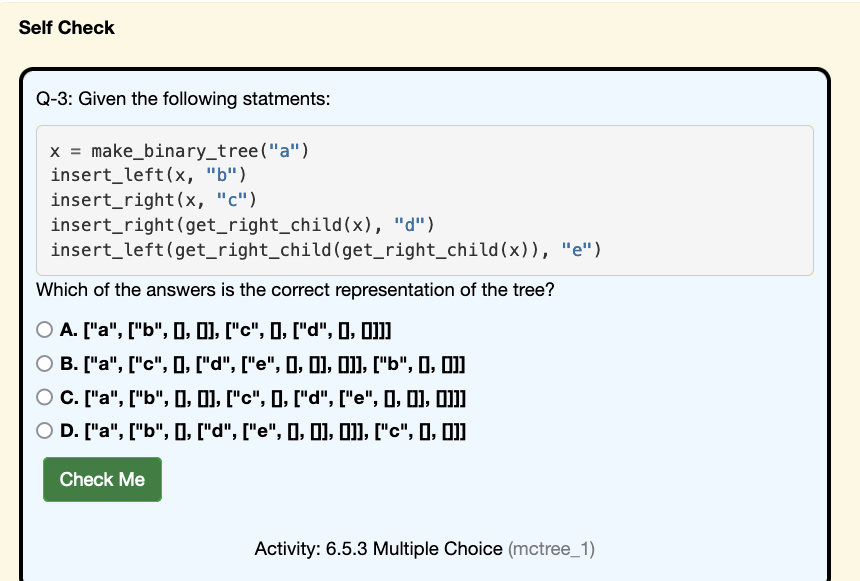

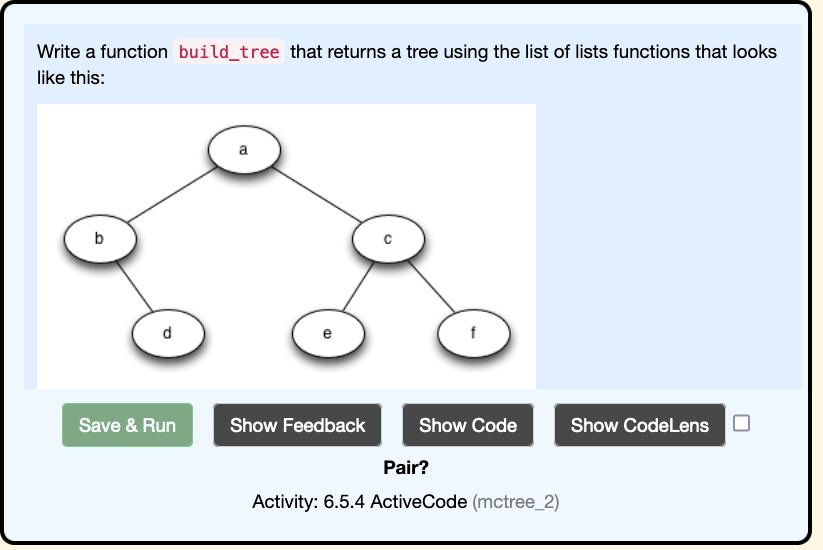

In [7]:
# do the above problem here...

### 6.6 - Nodes and References

Our second method to represent a tree uses nodes and references. In this case we will define a class that has attributes for the root value as well as the left and right subtrees. Using nodes and references, we might think of the tree as being structured like the one shown in Figure 2. Since this representation more closely follows the object-oriented programming paradigm, we will continue to use this representation for the remainder of the chapter.

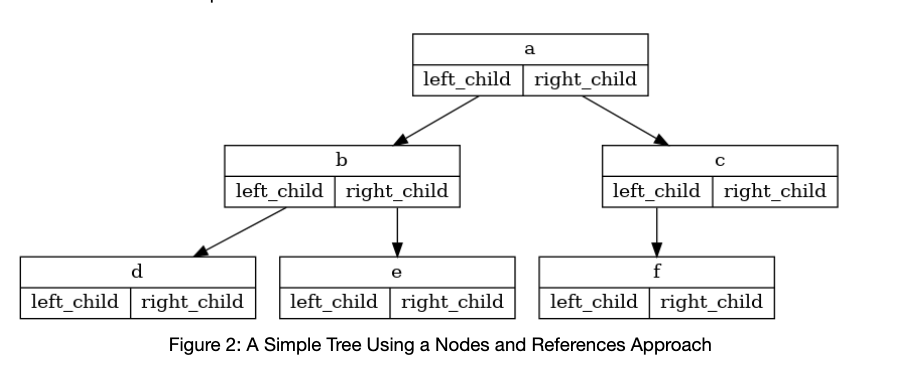

We will start out with a simple class definition for the nodes and references approach as shown in Listing 4. The important thing to remember about this representation is that the attributes `left_child` and `right_child` will become references to other instances of the `BinaryTree` class. For example, when we insert a new left child into the tree, we create another instance of `BinaryTree` and modify `self.left_child` in the root to reference the new tree.

In [8]:
# Listing 4

class BinaryTree:
    def __init__(self, root_obj):
        self.key = root_obj
        self.left_child = None
        self.right_child = None

Notice that in Listing 4, the constructor function expects to get some kind of object to store in the root. Just as you can store any object you like in a list, the root object of a tree can be a reference to any object. For our early examples, we will store the name of the node as the root value. Using nodes and references to represent the tree in Figure 2, we would create six instances of the `BinaryTree` class.

Next let’s look at the functions we need to build the tree beyond the root node. To add a left child to the tree, we will create a new binary tree object and set the `left_child` attribute of the root to refer to this new object. The code for `insert_left` is shown in Listing 5.

In [9]:
# Listing 5

def insert_left(self, new_node):

    if self.left_child is None:
        self.left_child = BinaryTree(new_node)
    else:
        new_child = BinaryTree(new_node)
        new_child.left_child = self.left_child
        self.left_child = new_child

We must consider two cases for insertion. The first case is characterized by a node with no existing left child. When there is no left child, simply add a node to the tree. The second case is characterized by a node with an existing left child. In the second case, we insert a node and push the existing child down one level in the tree. The second case is handled by the `else` statement on line 4 of Listing 5.

The code for `insert_right` must consider a symmetric set of cases. There will either be no right child, or we must insert the node between the root and an existing right child. The insertion code is shown in Listing 6.

In [10]:
# Listing 6

def insert_right(self, new_node):
    if self.right_child == None:
        self.right_child = BinaryTree(new_node)
    else:
        new_child = BinaryTree(new_node)
        new_child.right_child = self.right_child
        self.right_child = new_child

To round out the definition for a simple binary tree data structure, we will write accessor methods for the left and right children and for the root values (see Listing 7) .

In [11]:
# Listing 7

def get_root_val(self):
    return self.key

def set_root_val(self, new_obj):
    self.key = new_obj

def get_left_child(self):
    return self.left_child

def get_right_child(self):
    return self.right_child

Now that we have all the pieces to create and manipulate a binary tree, let’s use them to check on the structure a bit more. Let’s make a simple tree with node a as the root, and add nodes “b” and “c” as children. ActiveCode 1 creates the tree and looks at the some of the values stored in key, `left_child`, and `right_child`. Notice that both the left and right children of the root are themselves distinct instances of the `BinaryTree` class. As we said in our original recursive definition for a tree, this allows us to treat any child of a binary tree as a binary tree itself.

In [12]:
# _dsp-6_6_1_bintree.py

def make_binary_tree(root):
    return [root, [], []]


def insert_left(root, new_child):
    old_child = root.pop(1)
    if len(old_child) > 1:
        root.insert(1, [new_child, old_child, []])
    else:
        root.insert(1, [new_child, [], []])
    return root


def insert_right(root, new_child):
    old_child = root.pop(2)
    if len(old_child) > 1:
        root.insert(2, [new_child, [], old_child])
    else:
        root.insert(2, [new_child, [], []])
    return root


def get_root_val(root):
    return root[0]


def set_root_val(root, new_value):
    root[0] = new_value


def get_left_child(root):
    return root[1]


def get_right_child(root):
    return root[2]


a_tree = make_binary_tree(3)
insert_left(a_tree, 4)
insert_left(a_tree, 5)
insert_right(a_tree, 6)
insert_right(a_tree, 7)
left_child = get_left_child(a_tree)
print(left_child)

set_root_val(left_child, 9)
print(a_tree)
insert_left(left_child, 11)
print(a_tree)
print(get_right_child(get_right_child(a_tree)))

[5, [4, [], []], []]
[3, [9, [4, [], []], []], [7, [], [6, [], []]]]
[3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]]
[6, [], []]


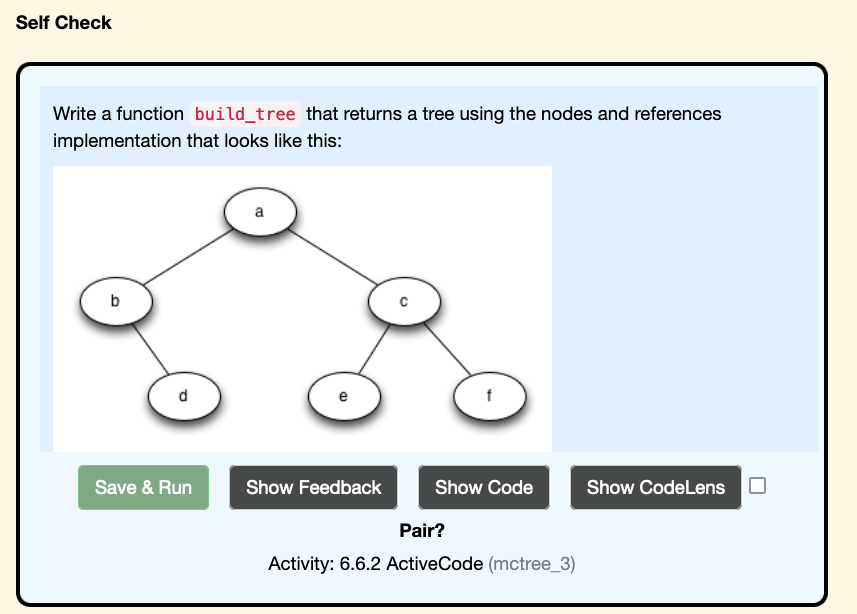

In [ ]:
# your answer to the above, below...

### 6.7 - Parse Tree

With the implementation of our tree data structure complete, we now look at an example of how a tree can be used to solve some real problems. In this section we will look at ***parse trees***. Parse trees can be used to represent real-world constructions like sentences or mathematical expressions.

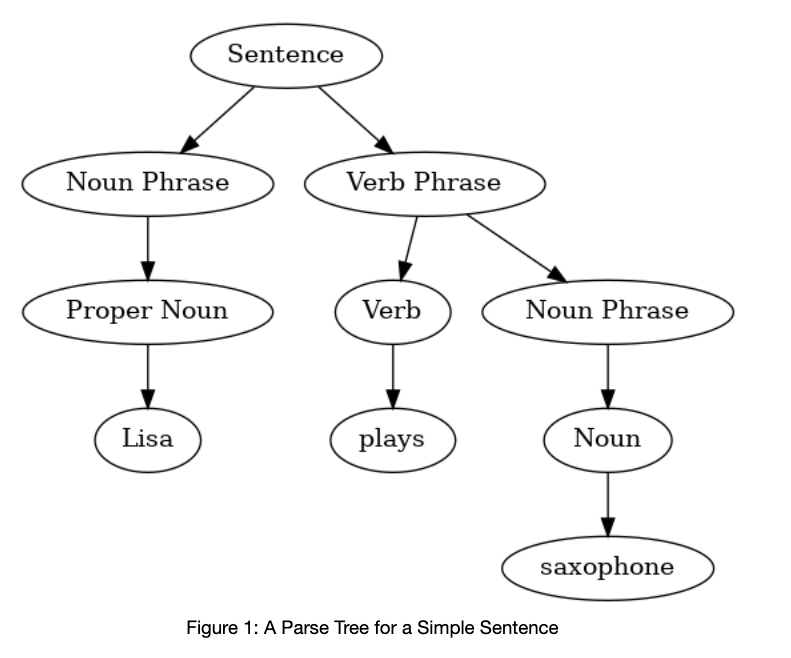

Figure 1 shows the hierarchical structure of a simple sentence. Representing a sentence as a tree structure allows us to work with the individual parts of the sentence by using subtrees.

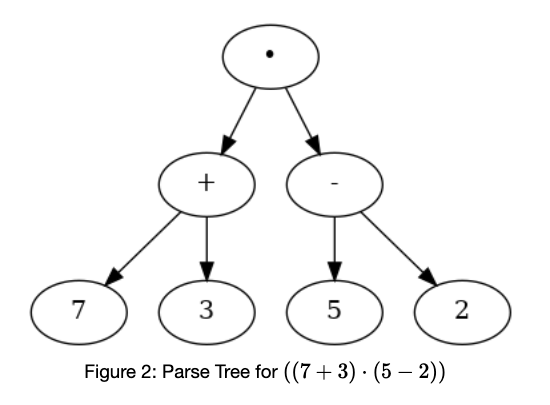

We can also represent a mathematical expression such as `((7 + 3) * (5 - 2))` as a parse tree, as shown in Figure 2. We have already looked at fully parenthesized expressions, so what do we know about this expression? We know that multiplication has a higher precedence than either addition or subtraction. Because of the parentheses, we know that before we can do the multiplication we must evaluate the parenthesized addition and subtraction expressions. The hierarchy of the tree helps us understand the order of evaluation for the whole expression. Before we can evaluate the top-level multiplication, we must evaluate the addition and the subtraction in the subtrees. The addition, which is the left subtree, evaluates to 10. The subtraction, which is the right subtree, evaluates to 3. Using the hierarchical structure of trees, we can simply replace an entire subtree with one node once we have evaluated the expressions in the children. Applying this replacement procedure gives us the simplified tree shown in Figure 3.

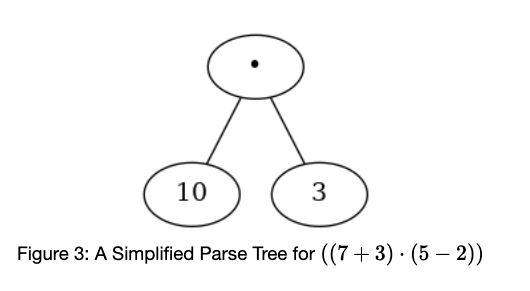

In the rest of this section we are going to examine parse trees in more detail. In particular we will look at

- How to build a parse tree from a fully parenthesized mathematical expression.

- How to evaluate the expression stored in a parse tree.

- How to recover the original mathematical expression from a parse tree.

The first step in building a parse tree is to break up the expression string into a list of tokens. There are four different kinds of tokens to consider: left parentheses, right parentheses, operators, and operands. We know that whenever we read a left parenthesis we are starting a new expression, and hence we should create a new tree to correspond to that expression. Conversely, whenever we read a right parenthesis, we have finished an expression. We also know that operands are going to be leaf nodes and children of their operators. Finally, we know that every operator is going to have both a left and a right child.

Using the information from above we can define four rules as follows:

1. If the current token is a `"("`, add a new node as the left child of the current node, and descend to the left child.

2. If the current token is in the list `["+", "-", "/", "*"]`, set the root value of the current node to the operator represented by the current token. Add a new node as the right child of the current node and descend to the right child.

3. If the current token is a number, set the root value of the current node to the number and return to the parent.

4. If the current token is a `")"`, go to the parent of the current node.

Before writing the Python code, let’s look at an example of the rules outlined above in action. We will use the expression `(3 + (4 * 5))`.  We will parse this expression into the following list of character tokens: `["(", "3", "+", "(", "4", "*", "5", ")", ")"]`. Initially we will start out with a parse tree that consists of an empty root node. Figure 4 illustrates the structure and contents of the parse tree as each new token is processed.

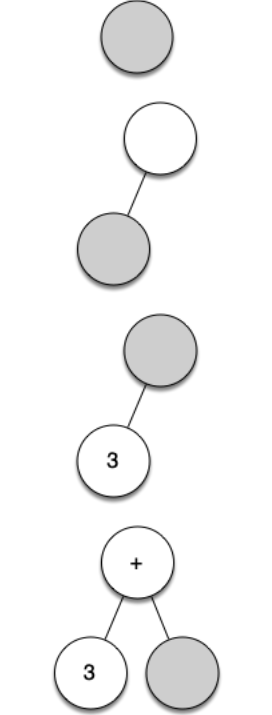

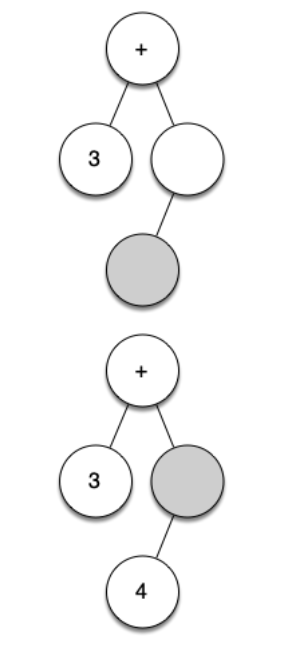

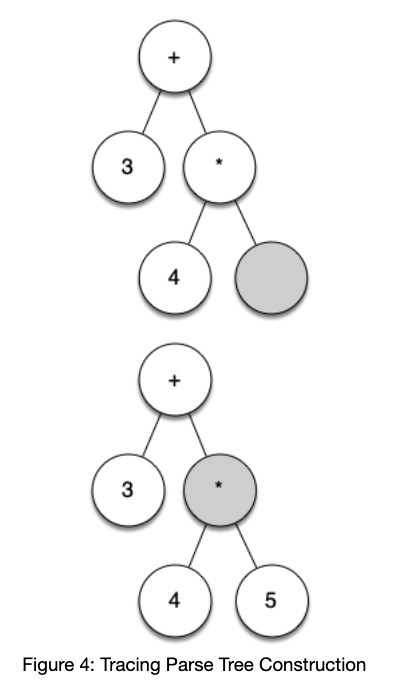

Using Figure 4 and the example expression from the previous paragraph, let’s walk through the example step by step:

a. Create an empty tree.

b. Read `(` as the first token. By rule 1, create a new node as the left child of the root. Make the current node this new child.

c. Read `3` as the next token. By rule 3, set the root value of the current node to `3` and go back up the tree to the parent.

d. Read `+` as the next token. By rule 2, set the root value of the current node to `+` and add a new node as the right child. The new right child becomes the current node.

e. Read `(` as the next token. By rule 1, create a new node as the left child of the current node. The new left child becomes the current node.

f. Read `4` as the next token. By rule 3, set the value of the current node to `4`. Make the parent of `4` the current node.

g. Read `*` as the next token. By rule 2, set the root value of the current node to `*` and create a new right child. The new right child becomes the current node.

h. Read `5` as the next token. By rule 3, set the root value of the current node to `5`. Make the parent of `5` the current node.

i. Read `)` as the next token. By rule 4 we make the parent of `*` the current node.

j. Read `)` as the next token. By rule 4 we make the parent of `+` the current node. At this point there is no parent for `+`, so we are done.

From the example above, it is clear that we need to keep track of the current node as well as the parent of the current node. The tree interface provides us with a way to get children of a node, through the `get_left_child` and `get_right_child` methods, but how can we keep track of the parent? A simple solution to keeping track of parents as we traverse the tree is to use a stack. Whenever we want to descend to a child of the current node, we first push the current node on the stack. When we want to return to the parent of the current node, we pop the parent off the stack.

Using the rules described above, along with the `Stack` and `BinaryTree` operations, we are now ready to write a Python function to create a parse tree. The code for our parse tree builder is presented in ActiveCode 1.

In [13]:
# _dsp-6_7_1-parsebuild.py
#

from pythonds3.basic import Stack
from pythonds3.trees import BinaryTree


def build_parse_tree(fp_expr):
    fp_list = fp_expr.split()
    p_stack = Stack()
    expr_tree = BinaryTree("")
    p_stack.push(expr_tree)
    current_tree = expr_tree

    for i in fp_list:
        if i == "(":
            current_tree.insert_left("")
            p_stack.push(current_tree)
            current_tree = current_tree.left_child
        elif i in ["+", "-", "*", "/"]:
            current_tree.root = i
            current_tree.insert_right("")
            p_stack.push(current_tree)
            current_tree = current_tree.right_child
        elif i.isdigit():
              current_tree.root = int(i)
              parent = p_stack.pop()
              current_tree = parent
        elif i == ")":
              current_tree = p_stack.pop()
        else:
              raise ValueError(f"Unknown operator '{i}'")

    return expr_tree


pt = build_parse_tree("( ( 10 + 5 ) * 3 )")
pt.postorder()  # defined and explained in the next section


10 5 + 3 * 

The four rules for building a parse tree are coded as the first four clauses of the `if..elif` statements on lines 13, 17, 22, and 26 of ActiveCode 1. In each case you can see that the code implements the rule, as described above, with a few calls to the `BinaryTree` or `Stack` methods. The only error checking we do in this function is in the `else` clause where a `ValueError` exception will be raised if we get a token from the list that we do not recognize.

Now that we have built a parse tree, what can we do with it? As a first example, we will write a function to evaluate the parse tree and return the numerical result. To write this function, we will make use of the hierarchical nature of the tree. Look back at Figure 2. Recall that we can replace the original tree with the simplified tree shown in Figure 3. This suggests that we can write an algorithm that evaluates a parse tree by recursively evaluating each subtree.

As we have done with past recursive algorithms, we will begin the design for the recursive evaluation function by identifying the base case. A natural base case for recursive algorithms that operate on trees is to check for a leaf node. In a parse tree, the leaf nodes will always be operands. Since numerical objects like integers and floating points require no further interpretation, the `evaluate` function can simply return the value stored in the leaf node. The recursive step that moves the function toward the base case is to call `evaluate` on both the left and the right children of the current node. The recursive call effectively moves us down the tree, toward a leaf node.

To put the results of the two recursive calls together, we can simply apply the operator stored in the parent node to the results returned from evaluating both children. In the example from Figure 3 we see that the two children of the root evaluate to themselves, namely 10 and 3. Applying the multiplication operator gives us a final result of 30.

The code for a recursive `evaluate` function is shown in Listing 1. First, we obtain references to the left and the right children of the current node. If both the left and right children evaluate to `None`, then we know that the current node is really a leaf node. This check is on line 7. If the current node is not a leaf node, look up the operator in the current node and apply it to the results from recursively evaluating the left and right children.

In [14]:
# Listing 1

import operator


def evaluate(parse_tree):
    operators = {
        "+": operator.add,
        "-": operator.sub,
        "*": operator.mul,
        "/": operator.truediv,
    }

    left_child = parse_tree.left_child
    right_child = parse_tree.right_child

    if left_child and right_child:
        fn = operators[parse_tree.root]
        return fn(evaluate(left_child), evaluate(right_child))
    else:
        return parse_tree.root

To implement the arithmetic, we use a dictionary with the keys `"+"`, `"-"`, `"*"`, and `"/"`. The values stored in the dictionary are functions from Python’s `operator` module. The `operator` module provides us with the function versions of many commonly used operators. When we look up an operator in the dictionary, the corresponding function object is retrieved. Since the retrieved object is a function, we can call it in the usual way: `function(param1, param2)`. So the lookup `operators ["+"](2, 2)` is equivalent to `operator.add(2, 2)`.

Finally, we will trace the `evaluate` function on the parse tree we created in Figure 4. When we first call `evaluate`, we pass the root of the entire tree as the parameter `parse_tree`. Then we obtain references to the left and right children to make sure they exist. The recursive call takes place on line 17. We begin by looking up the operator in the root of the tree, which is `"+"`. The `"+"` operator maps to the `operator.add` function call, which takes two parameters. As usual for a Python function call, the first thing Python does is to evaluate the parameters that are passed to the function. In this case both parameters are recursive function calls to our `evaluate` function. Using left-to-right evaluation, the first recursive call goes to the left. In the first recursive call the `evaluate` function is given the left subtree. We find that the node has no left or right children, so we are in a leaf node. When we are in a leaf node, we just return the value stored in the leaf node as the result of the evaluation. In this case we return the integer 3.

At this point we have one parameter evaluated for our top-level call to `operator.add`. But we are not done yet. Continuing the left-to-right evaluation of the parameters, we now make a recursive call to evaluate the right child of the root. We find that the node has both a left and a right child so we look up the operator stored in this node, `"*"`, and call this function using the left and right children as the parameters. At this point you can see that both recursive calls will be to leaf nodes, which will evaluate to the integers 4 and 5 respectively. With the two parameters evaluated, we return the result of operator.mul(4, 5). At this point we have evaluated the operands for the top level `"+"` operator and all that is left to do is finish the call to `operator.add(3, 20)`. The result of the evaluation of the entire expression tree for `(3 + 4 * 5))` is 23.

### 6.8 - Tree Traversals

Now that we have examined the basic functionality of our tree data structure, it is time to look at some additional usage patterns for trees. These usage patterns can be divided into three commonly used patterns to visit all the nodes in a tree. The difference between these patterns is the order in which each node is visited. We call this visitation of the nodes a ***tree traversal***. The three traversals we will look at are called *preorder*, *inorder*, and *postorder*. Let’s start out by defining these three traversals more carefully, then look at some examples where these patterns are useful.

***Preorder***

- In a ***preorder traversal***, we visit the root node first, then recursively do a preorder traversal of the left subtree, followed by a recursive preorder traversal of the right subtree.

***Inorder***

- In an ***inorder traversal***, we recursively do an inorder traversal on the left subtree, visit the root node, and finally do a recursive inorder traversal of the right subtree.

***Postorder***

- In a ***postorder traversal***, we recursively do a postorder traversal of the left subtree and the right subtree followed by a visit to the root node.

Let’s look at some examples that illustrate each of these three kinds of traversals. First let’s look at the preorder traversal using a book as an example tree. The book is the root of the tree, and each chapter is a child of the root. Each section within a chapter is a child of the chapter, each subsection is a child of its section, and so on. Figure 5 shows a limited version of a book with only two chapters. Note that the traversal algorithm works for trees with any number of children, but we will stick with binary trees for now.


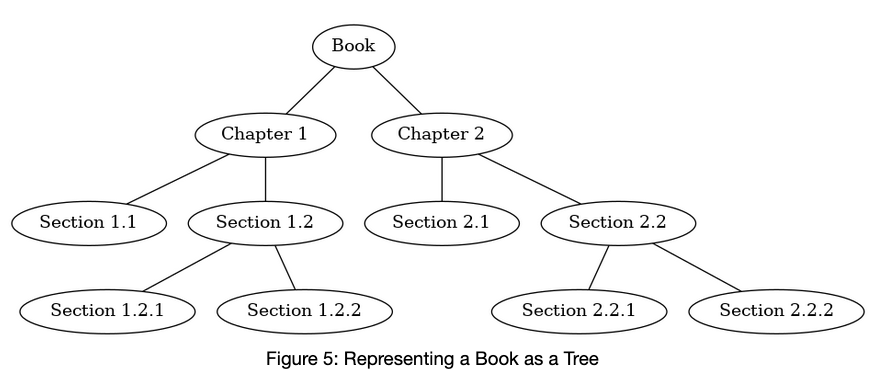

Suppose that you wanted to read this book from front to back. The preorder traversal gives you exactly that ordering. Starting at the root of the tree (the Book node) we will follow the preorder traversal instructions. We recursively call `preorder` on the left child, in this case Chapter1. We again recursively call `preorder` on the left child to get to Section 1.1. Since Section 1.1 has no children, we do not make any additional recursive calls. When we are finished with Section 1.1, we move up the tree to Chapter 1. At this point we still need to visit the right subtree of Chapter 1, which is Section 1.2. As before we visit the left subtree, which brings us to Section 1.2.1, then we visit the node for Section 1.2.2. With Section 1.2 finished, we return to Chapter 1. Then we return to the Book node and follow the same procedure for Chapter 2.

The code for writing tree traversals is surprisingly elegant, largely because the traversals are written recursively. You may wonder, what is the best way to write an algorithm like preorder traversal? Should it be a function that simply uses a tree as a data structure, or should it be a method of the tree data structure itself? Listing 2 shows a version of the preorder traversal written as an external function that takes a binary tree as a parameter. The external function is particularly elegant because our base case is simply to check if the tree exists. If the tree parameter is `None`, then the function returns without taking any action.

In [15]:
# Listing 2

def preorder(tree):
    if tree:
        print(tree.key)
        preorder(tree.left_child)
        preorder(tree.right_child)

We can also implement `preorder` as a method of the `BinaryTree` class. The code for implementing `preorder` as an internal method is shown in Listing 3. Notice what happens when we move the code from external to internal. In general, we just replace `tree` with `self`. However, we also need to modify the base case. The internal method must check for the existence of the left and the right children before making the recursive call to preorder.

```
# Listing 3

def preorder(self):
    print(self.key)
    if self.left_child:
        self.left_child.preorder()
    if self.right_child:
        self.right_child.preorder()
```

Which of these two ways to implement `preorder` is best? The answer is that implementing `preorder` as an external function is probably better in this case. The reason is that you very rarely want to just traverse the tree. In most cases you are going to want to accomplish something else while using one of the basic traversal patterns. In fact, we will see in the next example that the `postorder` traversal pattern follows very closely with the code we wrote earlier to evaluate a parse tree. Therefore we will write the rest of the traversals as external functions.

The algorithm for the `postorder` traversal, shown in Listing 4, is nearly identical to `preorder` except that we move the call to print to the end of the function.

In [16]:
# Listing 4

def postorder(tree):
    if tree:
        postorder(tree.left_child)
        postorder(tree.right_child)
        print(tree.key)

We have already seen a common use for the postorder traversal, namely evaluating a parse tree. Look back at Listing 1 again. The algorithm evaluates the left subtree, evaluates the right subtree, and combines them in the root through the function call to an operator. Assuming our binary tree is going to store only expression tree data, rewrite the evaluation function, but model it even more closely on the postorder code in Listing 4.

In [18]:
#Listing 5

def postordereval(tree):
    operators = {
        "+": operator.add,
        "-": operator.sub,
        "*": operator.mul,
        "/": operator.truediv,
    }
    result_1 = None
    result_2 = None
    if tree:
        result_1 = postordereval(tree.left_child)
        result_2 = postordereval(tree.right_child)
        if result_1 and result_2:
            return operators[tree.key](result_1, result_2)
        return tree.key

Notice that the form in Listing 4 is the same as the form in Listing 5, except that instead of printing the key at the end of the function, we return it. This allows us to save the values returned from the recursive calls in lines 11 and 12. We then use these saved values along with the operator on line 14.

The final traversal we will look at in this section is the inorder traversal. In the inorder traversal we visit the left subtree, followed by the root, and finally the right subtree. Listing 6 shows our code for the inorder traversal. Notice that in all three of the traversal functions we are simply changing the position of the `print` function with respect to the two recursive function calls.

In [19]:
#Listing 6

def inorder(tree):
    if tree:
        inorder(tree.left_child)
        print(tree.key)
        inorder(tree.right_child)

If we perform a simple inorder traversal of a parse tree, we get our original expression back without any parentheses. Let’s modify the basic inorder algorithm to allow us to recover the fully parenthesized version of the expression. The only modifications we will make to the basic template are as follows: print a left parenthesis before the recursive call to the left subtree, and print a right parenthesis after the recursive call to the right subtree. The modified code is shown in Listing 7.

In [20]:
#Listing 7

def print_exp(tree):
    result = ""
    if tree:
        result = "(" + print_exp(tree.left_child)
        result = result + str(tree.key)
        result = result + print_exp(tree.right_child) + ")"
    return result

Notice that the `print_exp` function as we have implemented it puts parentheses around each number. While not incorrect, the parentheses are clearly not needed. In the exercises at the end of this chapter you are asked to modify the `print_exp` function to remove this set of parentheses.

### 6.9 - Priority Queues with Binary Heaps

In earlier sections you learned about the first in, first out data structure called a queue. One important variation of a queue is called a ***priority queue***. A priority queue acts like a queue in that you dequeue an item by removing it from the front. However, in a priority queue the logical order of items inside a queue is determined by their priority. The highest priority items are at the front of the queue and the lowest priority items are at the back. Thus when you enqueue an item on a priority queue, the new item may move all the way to the front. We will see that the priority queue is a useful data structure for some of the graph algorithms we will study in the next chapter.

You can probably think of a couple of easy ways to implement a priority queue using sorting functions and lists. However, inserting into a list is `O(n)` and sorting a list is `O(n*log(n))`. We can do better. The classic way to implement a priority queue is using a data structure called a ***binary heap***. A binary heap will allow us both to enqueue and dequeue items in `O(log(n))`.

The binary heap is interesting to study because when we diagram the heap it looks a lot like a tree, but when we implement it we use only a single list as an internal representation. The binary heap has two common variations: the ***min heap***, in which the smallest key value is always at the front, and the ***max heap***, in which the largest key value is always at the front. In this section we will implement the min heap. We leave a max heap implementation as an exercise.

### 6.10 - Binary Heap Operations

The basic operations we will implement for our binary heap are as follows:

- `BinaryHeap()` creates a new empty binary heap.

- `insert(k)` adds a new item to the heap.

- `get_min()` returns the item with the minimum key value, leaving the item in the heap.

- `delete()` returns the item with the minimum key value, removing the item from the heap.

- `is_empty()` returns True if the heap is empty, False otherwise.

- `size()` returns the number of items in the heap.

- `heapify(list)` builds a new heap from a list of keys.

ActiveCode 1 demonstrates the use of some of the binary heap methods. Notice that no matter what order we add items to the heap, the smallest is removed each time.

In [21]:
# _dsp-6_10_1_heap1.py

from pythonds3.trees import BinaryHeap

my_heap = BinaryHeap()
my_heap.insert(5)
my_heap.insert(7)
my_heap.insert(3)
my_heap.insert(11)

print(my_heap.delete())
print(my_heap.delete())
print(my_heap.delete())
print(my_heap.delete())


3
5
7
11


### 6.11 - Binary Heap Implementation

### 6.11.1 - The Structure Property

In order to make our heap work efficiently, we will take advantage of the logarithmic nature of the binary tree to represent our heap. In order to guarantee logarithmic performance, we must keep our tree balanced. A balanced binary tree has roughly the same number of nodes in the left and right subtrees of the root. In our heap implementation we keep the tree balanced by creating a complete binary tree. A ***complete binary tree*** is a tree in which each level has all of its nodes. The exception to this is the bottom level of the tree, which we fill in from left to right. Figure 1 shows an example of a complete binary tree.

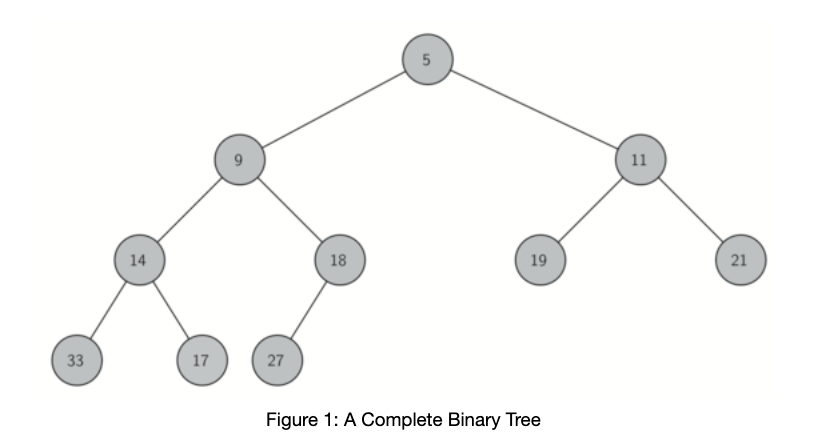

Another interesting property of a complete tree is that we can represent it using a single list. We do not need to use nodes and references or even lists of lists. Because the tree is complete, the left child of a parent (at position `p`) is the node that is found in position `2*p+1` in the list. Similarly, the right child of the parent is at position `2*p+2` in the list. To find the parent of any node in the tree, we can simply use Python’s integer division. Given that a node is at position `n` in the list, the parent is at position `(n-1)//2`. Figure 2 shows a complete binary tree and also gives the list representation of the tree. Note the `2*p+1` and `2*p+2` relationship between parent and children. The list representation of the tree, along with the full structure property, allows us to efficiently traverse a complete binary tree using only a few simple mathematical operations. We will see that this also leads to an efficient implementation of our binary heap.

### 6.11.2 - The Heap Order Property

The method that we will use to store items in a heap relies on maintaining the ***heap order property***. The heap order property is as follows: in a heap, for every node `x` with parent `p`, the key in `p` is smaller than or equal to the key in `x`b. Figure 2 also illustrates a complete binary tree that has the heap order property.

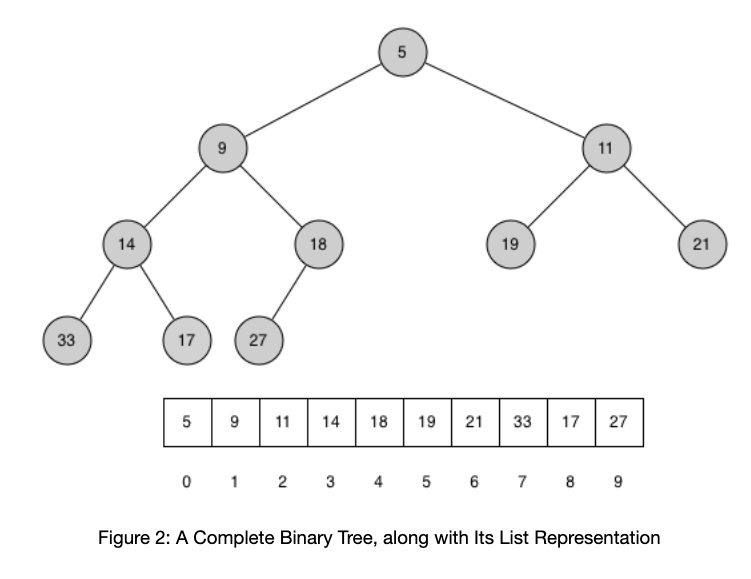

### 6.11.3 - Heap Operations

We will begin our implementation of a binary heap with the constructor. Since the entire binary heap can be represented by a single list, all the constructor will do is initialize the list. Listing 1 shows the Python code for the constructor.

In [22]:
# Listing 1

class BinaryHeap:
    def __init__(self):
        self._heap = []

The next method we will implement is `insert`. The easiest, and most efficient, way to add an item to a list is to simply append the item to the end of the list. The good news about appending is that it guarantees that we will maintain the complete tree property. The bad news about appending is that we will very likely violate the heap structure property. However, it is possible to write a method that will allow us to regain the heap structure property by comparing the newly added item with its parent. If the newly added item is less than its parent, then we can swap the item with its parent. Figure 2 shows the series of swaps needed to percolate the newly added item up to its proper position in the tree.

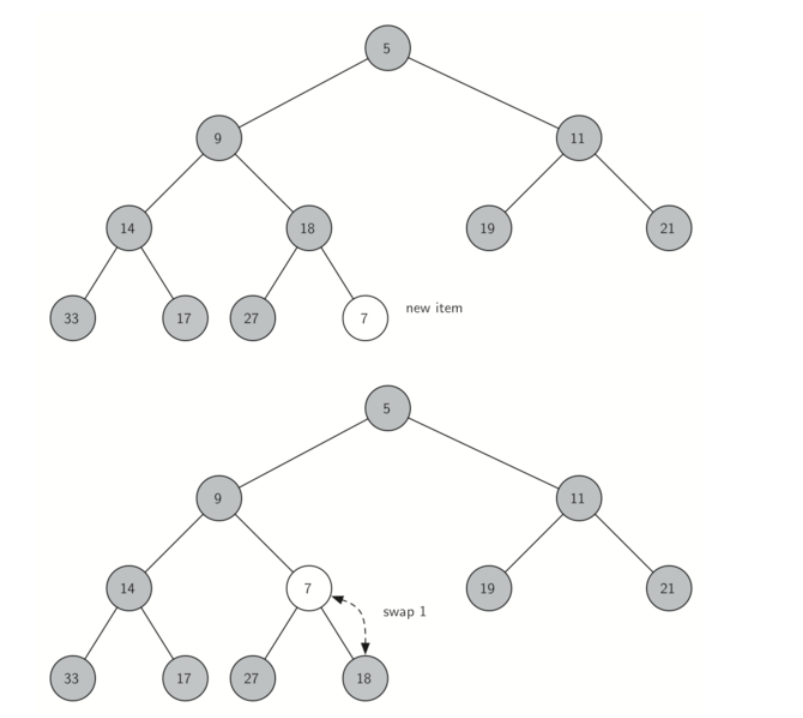

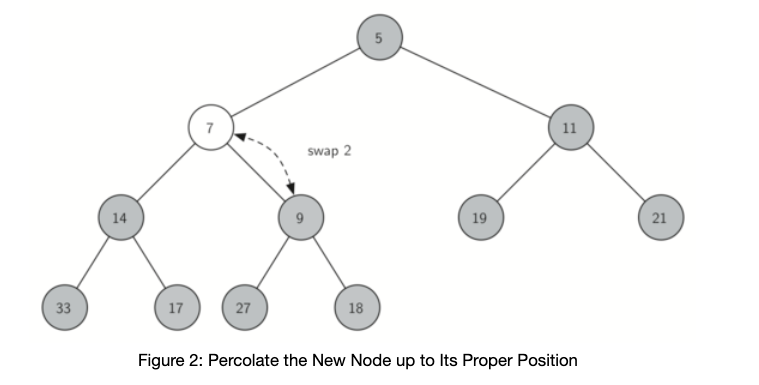

Notice that when we percolate an item up, we are restoring the heap property between the newly added item and the parent. We are also preserving the heap property for any siblings. Of course, if the newly added item is very small, we may still need to swap it up another level. In fact, we may need to keep swapping until we get to the top of the tree. Listing 2 shows the `_perc_up` method, which percolates a new item as far up in the tree as it needs to go to maintain the heap property. We used a leading underscore (`_`) in the name of the method as it is an internal operation. The parent of the current node can be computed by subtracting 1 from the index of the current node and dividing the result by 2.

We are now ready to write the `insert` method (see Listing 3). Most of the work in the `insert` method is really done by `_perc_up`. Once a new item is appended to the tree, `_perc_up` takes over and positions the new item properly.

In [23]:
# Listing 2

def _perc_up(self, i):
    while (i - 1) // 2 >= 0:
        parent_idx = (i - 1) // 2
        if self._heap[i] < self._heap[parent_idx]:
            self._heap[i], self._heap[parent_idx] = (
                self._heap[parent_idx],
                self._heap[i],
            )
        i = parent_idx

In [24]:
# Listing 3

def insert(self, item):
    self._heap.append(item)
    self._perc_up(len(self._heap) - 1)

With the `insert` method properly defined, we can now look at the `delete` method. Since the heap property requires that the root of the tree be the smallest item in the tree, finding the minimum item is easy. The hard part of `delete` is restoring full compliance with the heap structure and heap order properties after the root has been removed. We can restore our heap in two steps. First, we will restore the root item by taking the last item in the list and moving it to the root position. Moving the last item maintains our heap structure property. However, we have probably destroyed the heap order property of our binary heap. Second, we will restore the heap order property by pushing the new root node down the tree to its proper position. Figure 3 shows the series of swaps needed to move the new root node to its proper position in the heap.

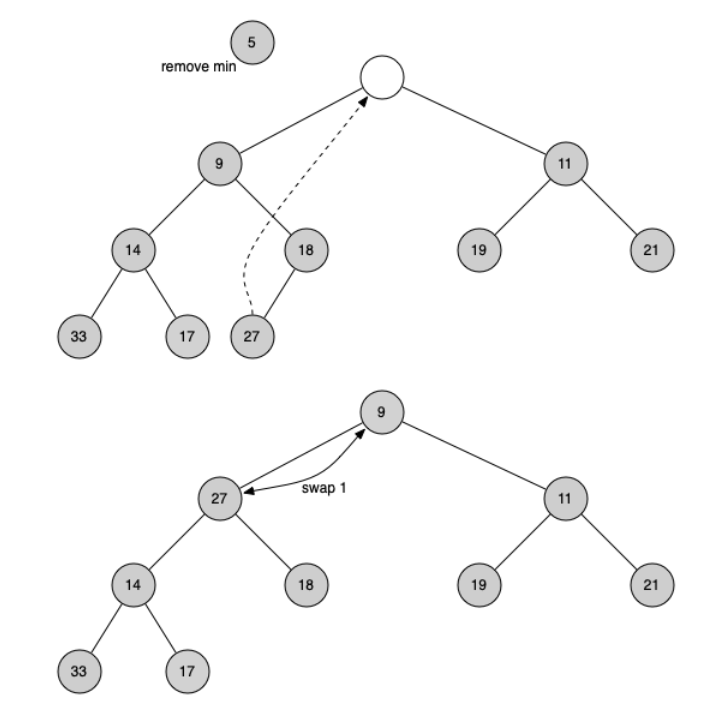

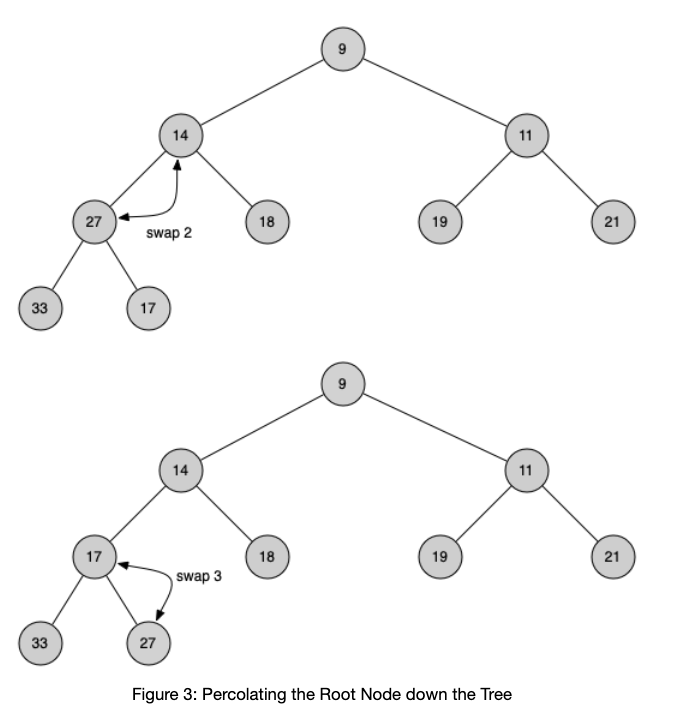

In order to maintain the heap order property, all we need to do is swap the root with its smaller child that is less than the root. After the initial swap, we may repeat the swapping process with a node and its children until the node is swapped into a position on the tree where it is already less than both children. The code for percolating a node down the tree is found in the `_perc_down` and `_get_min_child` methods in Listing 4.

In [25]:
# Listing 4

def _perc_down(self, i):
    while 2 * i + 1 < len(self._heap):
        sm_child = self._get_min_child(i)
        if self._heap[i] > self._heap[sm_child]:
            self._heap[i], self._heap[sm_child] = (
                self._heap[sm_child],
                self._heap[i],
            )
        else:
            break
        i = sm_child

def _get_min_child(self, i):
    if 2 * i + 2 > len(self._heap) - 1:
        return 2 * i + 1
    if self._heap[2 * i + 1] < self._heap[2 * i + 2]:
        return 2 * i + 1
    return 2 * i + 2

The code for the `delete` operation is in Listing 5. Note that once again the hard work is handled by a helper function, in this case `_perc_down`.

In [26]:
# Listing 5

def delete(self):
    self._heap[0], self._heap[-1] = self._heap[-1], self._heap[0]
    result = self._heap.pop()
    self._perc_down(0)
    return result

To finish our discussion of binary heaps, we will look at a method to build an entire heap from a list of keys. The first method you might think of may be like the following. Given a list of keys, you could easily build a heap by inserting each key one at a time. Since you are starting with an empy list, it is sorted and you could use binary search to find the right position to insert the next key at a cost of approximately `O(log(n))` operations. However, remember that inserting an item in the middle of the list may require `O(n)` operations to shift the rest of the list over to make room for the new key. Therefore, to insert keys into the heap would require a total of `O(n*log(n))` operations. However, if we start with an entire list then we can build the whole heap in `O(n)` operations. Listing 6 shows the code to build the entire heap.

In [27]:
# Listing 6

def heapify(self, not_a_heap):
    self._heap = not_a_heap[:]
    i = len(self._heap) // 2 - 1
    while i >= 0:
        self._perc_down(cuir_idx)
        i = i - 1

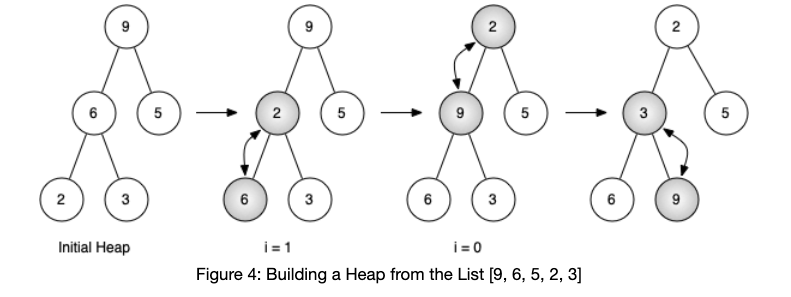

Figure 4 shows the swaps that the `heapify` method makes as it moves the nodes in an initial tree of `[9, 6, 5, 2, 3]` into their proper positions. Although we start out in the middle of the tree and work our way back toward the root, the `_perc_down` method ensures that the largest child is always moved down the tree. Because the heap is a complete binary tree, any nodes past the halfway point will be leaves and therefore have no children. Notice that when i = 0, we are percolating down from the root of the tree, so this may require multiple swaps. As you can see in the rightmost two trees of Figure 4, first the 9 is moved out of the root position, but after 9 is moved down one level in the tree, `_perc_down` ensures that we check the next set of children farther down in the tree to ensure that it is pushed as low as it can go. In this case it results in a second swap with 3. Now that 9 has been moved to the lowest level of the tree, no further swapping can be done. It is useful to compare the list representation of this series of swaps with the tree representation shown in Figure 4

```
start  [9, 6, 5, 2, 3]
i = 1  [9, 2, 5, 6, 3]
i = 0  [2, 3, 5, 6, 9]
```

The complete binary heap implementation can be seen in ActiveCode 1.

In [28]:
# _dsp-6_11_1_completeheap.py

class BinaryHeap:
    def __init__(self):
        self._heap = []

    def _perc_up(self, cur_idx):
        while (cur_idx - 1) // 2 >= 0:
            parent_idx = (cur_idx - 1) // 2
            if self._heap[cur_idx] < self._heap[parent_idx]:
                self._heap[cur_idx], self._heap[parent_idx] = (
                    self._heap[parent_idx],
                    self._heap[cur_idx],
                )
            cur_idx = parent_idx

    def _perc_down(self, cur_idx):
        while 2 * cur_idx + 1 < len(self._heap):
            min_child_idx = self._get_min_child(cur_idx)
            if self._heap[cur_idx] > self._heap[min_child_idx]:
                self._heap[cur_idx], self._heap[min_child_idx] = (
                    self._heap[min_child_idx],
                    self._heap[cur_idx],
                )
            else:
                return
            cur_idx = min_child_idx

    def _get_min_child(self, parent_idx):
        if 2 * parent_idx + 2 > len(self._heap) - 1:
            return 2 * parent_idx + 1
        if self._heap[2 * parent_idx + 1] < self._heap[2 * parent_idx + 2]:
            return 2 * parent_idx + 1
        return 2 * parent_idx + 2

    def heapify(self, not_a_heap):
        self._heap = not_a_heap[:]
        cur_idx = len(self._heap) // 2 - 1
        while cur_idx >= 0:
            self._perc_down(cur_idx)
            cur_idx = cur_idx - 1

    def get_min(self):
        return self._heap[0]

    def insert(self, item):
        self._heap.append(item)
        self._perc_up(len(self._heap) - 1)

    def delete(self):
        self._heap[0], self._heap[-1] = self._heap[-1], self._heap[0]
        result = self._heap.pop()
        self._perc_down(0)
        return result

    def is_empty(self):
        return not bool(self._heap)

    def __len__(self):
        return len(self._heap)

    def __str__(self):
        return str(self._heap)

a_heap = BinaryHeap()
a_heap.heapify([9, 5, 6, 2, 3])
print (a_heap)

while not a_heap.is_empty():
    print(a_heap.delete())


[2, 3, 6, 5, 9]
2
3
5
6
9


The assertion that we can build the heap in `O(n)` may seem a bit mysterious at first, and a proof is beyond the scope of this book. However, the key to understanding that you can build the heap in `O(n)` is to remember that the factor is derived from the height of the tree. For most of the work in `heapify`, the tree is shorter than `log(n)`.

Using the fact that you can build a heap from a list in `O(n)` time, you will construct a sorting algorithm that uses a heap and sorts a list in `O(n*log(n))` as an exercise at the end of this chapter.


### 6.12 - Binary Search Trees

We have already seen two different ways to get key-value pairs in a collection. Recall that these collections implement the ***map*** abstract data type. The two implementations of the map ADT that we have discussed were binary search on a list and hash tables. In this section we will study ***binary search trees*** as yet another way to map from a key to a value. In this case we are not interested in the exact placement of items in the tree, but we are interested in using the binary tree structure to provide for efficient searching.
Sponsored: Fellow

### 6.13 - Search Tree Operations

Before we look at the implementation, let’s review the interface provided by the map ADT. You will notice that this interface is very similar to the Python dictionary.

- `Map()` creates a new empty map.

- `put(key, val)` adds a new key–value pair to the map. If the key is already in the map, it replaces the old value with the new value.

- `get(key)` takes a key and returns the matching value stored in the map or None otherwise.

- `del` deletes the key–value pair from the map using a statement of the form del map[key].

- `size()` returns the number of key–value pairs stored in the map.

- `in` returns `True` for a statement of the form `key in map` if the given key is in the map, `False` otherwise.

### 6.14 - Search Tree Implementation

A binary search tree (BST) relies on the property that keys that are less than the parent are found in the left subtree, and keys that are greater than the parent are found in the right subtree. We will call this the ***BST property***. As we implement the `Map` interface as described above, the BST property will guide our implementation. Figure 1 illustrates this property of a binary search tree, showing the keys without any associated values. Notice that the property holds for each parent and child. All of the keys in the left subtree are less than the key in the root. All of the keys in the right subtree are greater than the root.

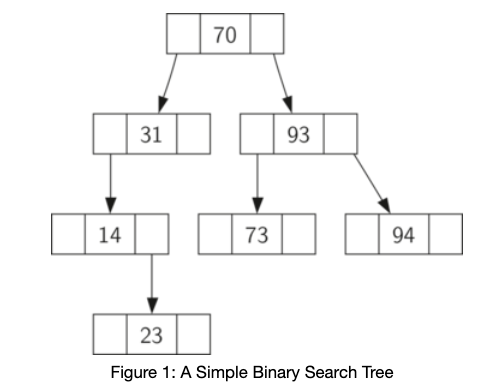

Now that you know what a binary search tree is, we will look at how a binary search tree is constructed. The search tree in Figure 1 represents the nodes that exist after we have inserted the following keys in the order shown: 70, 31, 93, 94, 14, 23, 73. Since 70 was the first key inserted into the tree, it is the root. Next, 31 is less than 70, so it becomes the left child of 70. Next, 93 is greater than 70, so it becomes the right child of 70. Now we have two levels of the tree filled, so the next key is going to be the left or right child of either 31 or 93. Since 94 is greater than 70 and 93, it becomes the right child of 93. Similarly 14 is less than 70 and 31, so it becomes the left child of 31. 23 is also less than 31, so it must be in the left subtree of 31. However, it is greater than 14, so it becomes the right child of 14.

To implement the binary search tree, we will use the nodes and references approach similar to the one we used to implement the linked list and the expression tree. However, because we must be able create and work with a binary search tree that is empty, our implementation will use two classes. The first class we will call `BinarySearchTree`, and the second class we will call `TreeNode`. The `BinarySearchTree` class has a reference to the `TreeNode` that is the root of the binary search tree. In most cases the external methods defined in the outer class simply check to see if the tree is empty. If there are nodes in the tree, the request is just passed on to a private method defined in the `BinarySearchTree` class that takes the root as a parameter. In the case where the tree is empty or we want to delete the key at the root of the tree, we must take special action. The code for the `BinarySearchTree` class constructor along with a few other miscellaneous methods is shown in Listing 1.

In [29]:
# Listing 1

class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.size = 0

    def __len__(self):
        return self.size

    def __iter__(self):
        return self.root.__iter__()

The `TreeNode` class provides many helper methods that make the work done in the `BinarySearchTree` class methods much easier. The constructor for a `TreeNode`, along with these helper methods, is shown in Listing 2. As you can see in the listing many of these helper methods help to classify a node according to its own position as a child (left or right) and the kind of children the node has. The `TreeNode` class will also explicitly keep track of the parent as an attribute of each node. You will see why this is important when we discuss the implementation for the `del` operator.

Another interesting aspect of the implementation of `TreeNode` in Listing 2 is that we use Python’s optional parameters. Optional parameters make it easy for us to create a `TreeNode` under several different circumstances. Sometimes we will want to construct a new `TreeNode` that already has both a parent and a child (e.g. left) and in that case we can pass `parent` and `left_child` as parameters. At other times we will just create a `TreeNode `with the key-value pair, and we will not pass any parameters for `parent` or `child`. In this case, the default values of the optional parameters are used.

In [30]:
# Listing 2

class TreeNode:
    def __init__(self, key, value, left=None, right=None, parent=None):
        self.key = key
        self.value = value
        self.left_child = left
        self.right_child = right
        self.parent = parent

    def is_left_child(self):
        return self.parent and self.parent.left_child is self

    def is_right_child(self):
        return self.parent and self.parent.right_child is self

    def is_root(self):
        return not self.parent

    def is_leaf(self):
        return not (self.right_child or self.left_child)

    def has_any_child(self):
        return self.right_child or self.left_child

    def has_children(self):
        return self.right_child and self.left_child

    def replace_value(self, key, value, left, right):
        self.key = key
        self.value = value
        self.left_child = left
        self.right_child = right
        if self.left_child:
            self.left_child.parent = self
        if self.right_child:
            self.right_child.parent = self

Now that we have the `BinarySearchTree` shell and the `TreeNode`, it is time to write the put method that will allow us to build our binary search tree. The put method is a method of the `BinarySearchTree` class. This method will check to see if the tree already has a root. If there is not a root, then put will create a new `TreeNode` and install it as the root of the tree. If a root node is already in place, then put calls the private recursive helper method `_put` to search the tree according to the following algorithm:

- Starting at the root of the tree, search the binary tree comparing the new key to the key in the current node. If the new key is less than the current node, search the left subtree. If the new key is greater than the current node, search the right subtree.

- When there is no left or right child to search, we have found the position in the tree where the new node should be installed.

- To add a node to the tree, create a new `TreeNode` object and insert the object at the point discovered in the previous step.

Listing 3 shows the Python code for inserting a new node in the tree. The `_put` method is written recursively following the steps outlined above. Notice that when a new child is inserted into the tree, the `current_node` is passed to the new tree as the parent.

One important problem with our implementation of insertion is that duplicate keys are not handled properly. As our tree is implemented, a duplicate key will create a new node with the same key value in the right subtree of the node having the original key. The result of this is that the node with the new key will never be found during a search. A better way to handle the insertion of a duplicate key is for the value associated with the new key to replace the old value. We leave fixing this bug as an exercise for you.

In [31]:
# Listing 3

def put(self, key, value):
    if self.root:
        self._put(key, value, self.root)
    else:
        self.root = TreeNode(key, value)
    self.size = self.size + 1

def _put(self, key, value, current_node):
    if key < current_node.key:
        if current_node.left_child:
            self._put(key, value, current_node.left_child)
        else:
            current_node.left_child = TreeNode(key, value, parent=current_node)
    else:
        if current_node.right_child:
            self._put(key, value, current_node.right_child)
        else:
            current_node.right_child = TreeNode(key, value, parent=current_node)

With the `put` method defined, we can easily overload the `[]` operator for assignment by having the `__setitem__` method call the `put` method (see Listing 4). This allows us to write Python statements like `my_zip_tree['Plymouth'] = 55446`, just like a Python dictionary.

In [32]:
# Listing 4

def __setitem__(self, key, value):
    self.put(key, value)

Figure 2 illustrates the process for inserting a new node into a binary search tree. The lightly shaded nodes indicate the nodes that were visited during the insertion process.

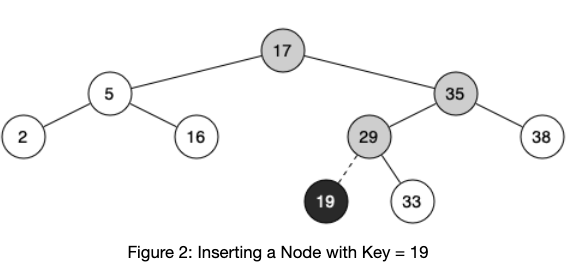

Once the tree is constructed, the next task is to implement the retrieval of a value for a given key. The get method is even easier than the put method because it simply searches the tree recursively until it gets to a non-matching leaf node or finds a matching key. When a matching key is found, the value stored in the payload of the node is returned.

Listing 5 shows the code for `get` and `_get`. The search code in the `_get` method uses the same logic for choosing the left or right child as the `_put` method. Notice that the `_get` method returns a `TreeNode` to `get`, this allows `_get` to be used as a flexible helper method for other `BinarySearchTree` methods that may need to make use of other data from the `TreeNode` besides the payload.

In [33]:
# Listing 5

def get(self, key):
    if self.root:
        result = self._get(key, self.root)
        if result:
            return result.value
    return None

def _get(self, key, current_node):
    if not current_node:
        return None
    if current_node.key == key:
        return current_node
    elif key < current_node.key:
        return self._get(key, current_node.left_child)
    else:
        return self._get(key, current_node.right_child)

By implementing the `__getitem__` method we can write a Python statement that looks just like we are accessing a dictionary, when in fact we are using a binary search tree, for example `z = my_zip_tree["Fargo"]`. As you can see in Listing 6, all the `__getitem__` method does is call `get`.

In [34]:
# Listing 6

def __getitem__(self, key):
    return self.get(key)

Using `get`, we can implement the `in` operation by writing a `__contains__` method for the `BinarySearchTree`. The `__contains__` method will simply call `get` and return `True` if `get` returns a value, or `False` if it returns `None`. The code for `__contains__` is shown in Listing 7.

In [35]:
# Listing 7

def __contains__(self, key):
    return bool(self._get(key, self.root))

Recall that `__contains__` overloads the `in` operator and allows us to write statements such as `"Northfield" in my_zip_tree`.

Finally, we turn our attention to the most challenging operation on the binary search tree, the deletion of a key (see Listing 8). The first task is to find the node to delete by searching the tree. If the tree has more than one node we search using the `_get` method to find the `TreeNode` that needs to be removed. If the tree only has a single node, that means we are removing the root of the tree, but we still must check to make sure the key of the root matches the key that is to be deleted. In either case if the key is not found the `del` operator raises an error.

In [36]:
# Listing 8

def delete(self, key):
    if self.size > 1:
        node_to_remove = self._get(key, self.root)
        if node_to_remove:
            self._delete(node_to_remove)
            self.size = self.size - 1
        else:
            raise KeyError("Error, key not in tree")
    elif self.size == 1 and self.root.key == key:
        self.root = None
        self.size = self.size - 1
    else:
        raise KeyError("Error, key not in tree")

Once we’ve found the node containing the key we want to delete, there are three cases that we must consider:

1. The node to be deleted has no children (see Figure 3).

2. The node to be deleted has only one child (see Figure 4).

3. The node to be deleted has two children (see Figure 5).

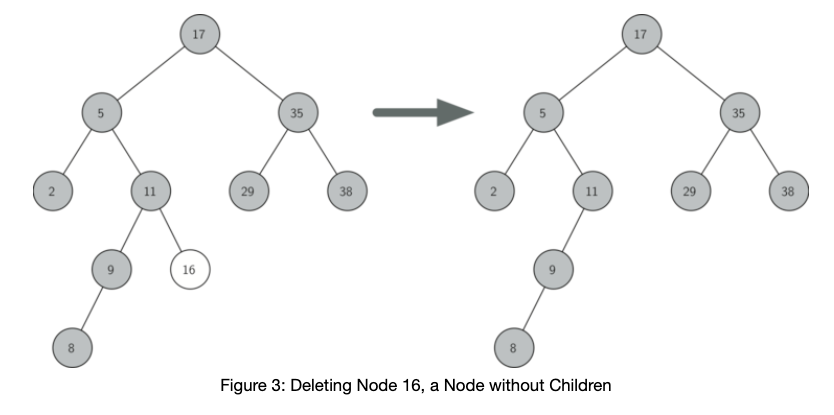

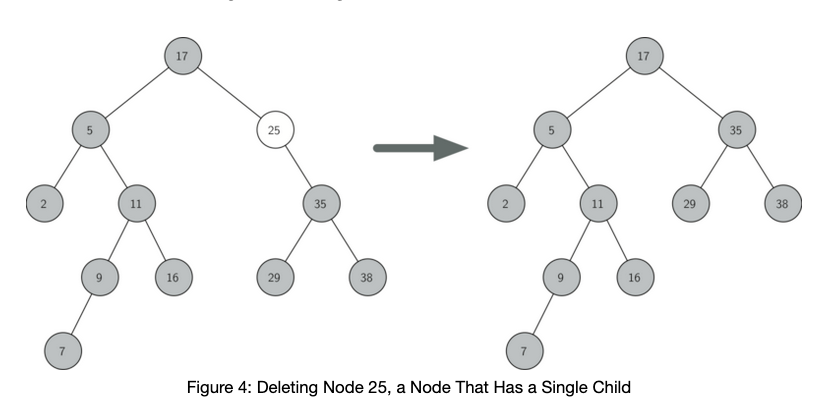

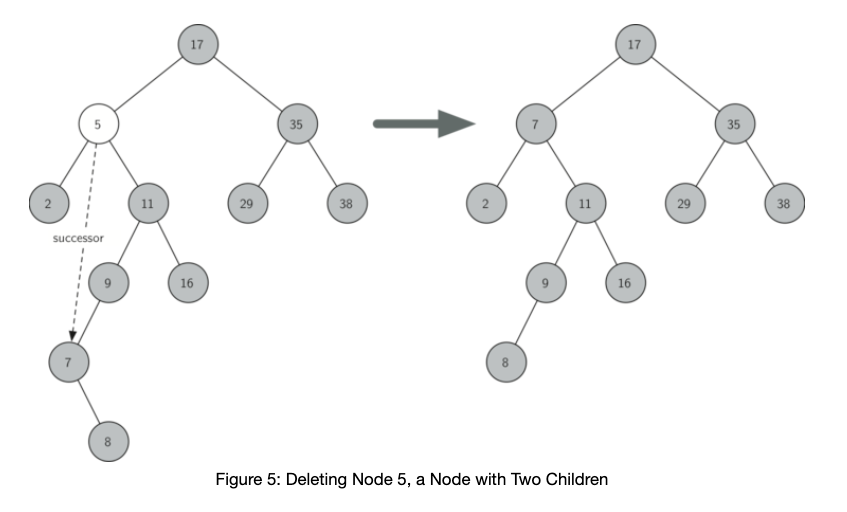

The first case is straightforward. If the current node has no children, all we need to do is delete the node and remove the reference to this node in the parent. The code for this case is shown in Listing 9.

In [37]:
# Listing 9

if current_node.is_leaf():
    if current_node == current_node.parent.left_child:
        current_node.parent.left_child = None
    else:
        current_node.parent.right_child = None

NameError: name 'current_node' is not defined

The second case is only slightly more complicated. If a node has only a single child, then we can simply promote the child to take the place of its parent. The code for this case is shown in Listing 10. As you look at this code, you will see that there are six cases to consider. Since the cases are symmetric with respect to either having a left or right child, we will just discuss the case where the current node has a left child. The decision proceeds as follows:

1. If the current node is a left child, then we only need to update the parent reference of the left child to point to the parent of the current node, and then update the left child reference of the parent to point to the current node’s left child.

2. If the current node is a right child, then we only need to update the parent reference of the left child to point to the parent of the current node, and then update the right child reference of the parent to point to the current node’s left child.

3. If the current node has no parent, it must be the root. In this case we will just replace the `key`, `value`, `left_child`, and `right_child` data by calling the `replace_value` method on the root.

```
# Listing 10

else:  # removing a node with one child
    if current_node.get_left_child():
        if current_node.is_left_child():
            current_node.left_child.parent = current_node.parent
            current_node.parent.left_child = current_node.left_child
        elif current_node.is_right_child():
            current_node.left_child.parent = current_node.parent
            current_node.parent.right_child = current_node.left_child
        else:
            current_node.replace_value(
                current_node.left_child.key,
                current_node.left_child.value,
                current_node.left_child.left_child,
                current_node.left_child.right_child,
            )
    else:
        if current_node.is_left_child():
            current_node.right_child.parent = current_node.parent
            current_node.parent.left_child = current_node.right_child
        elif current_node.is_right_child():
            current_node.right_child.parent = current_node.parent
            current_node.parent.right_child = current_node.right_child
        else:
            current_node.replace_value(
                current_node.right_child.key,
                current_node.right_child.value,
                current_node.right_child.left_child,
                current_node.right_child.right_child,
            )
```

The third case is the most difficult case to handle. If a node has two children, then it is unlikely that we can simply promote one of them to take the node’s place. We can, however, search the tree for a node that can be used to replace the one scheduled for deletion. What we need is a node that will preserve the binary search tree relationships for both of the existing left and right subtrees. The node that will do this is the node that has the next-largest key in the tree. We call this node the ***successor***, and we will look at a way to find the successor shortly. The successor is guaranteed to have no more than one child, so we know how to remove it using the two cases for deletion that we have already implemented. Once the successor has been removed, we simply put it in the tree in place of the node to be deleted. The code to handle the third case is shown in Listing 11.

In Listing 11 we make use of the helper methods `find_successor` and `splice_out` to find and remove the successor. The reason we use `splice_out` is that it goes directly to the node we want to splice out and makes the right changes. We could call `delete` recursively, but then we would waste time searching again for the key node.

```
# Listing 11

elif current_node.has_children():  # removing a node with two children
    successor = current_node.find_successor()
    successor.splice_out()
    current_node.key = successor.key
    current_node.value = successor.value
```


The code to find the successor is shown below (see Listing 12) and as you can see is a method of the `TreeNode` class. This code makes use of the same properties of binary search trees that cause an inorder traversal to print out the nodes in the tree from smallest to largest. There are three cases to consider when looking for the successor:

1. If the node has a right child, then the successor is the smallest key in the right subtree.

2. If the node has no right child and is the left child of its parent, then the parent is the successor.

3. If the node is the right child of its parent, and itself has no right child, then the successor to this node is the successor of its parent, excluding this node.

The first condition is the only one that matters for us when deleting a node from a binary search tree. However, the `find_successor` method has other uses that we will explore in the exercises at the end of this chapter.

The `find_min` method is called to find the minimum key in a subtree. You should convince yourself that the minimum value key in any binary search tree is the leftmost child of the tree. Therefore the `find_min` method simply follows the `left_child` references in each node of the subtree until it reaches a node that does not have a left child.

In [ ]:
# Listing 12

def find_successor(self):
    successor = None
    if self.right_child:
        successor = self.right_child.find_min()
    else:
        if self.parent:
            if self.is_left_child():
                successor = self.parent
            else:
                self.parent.right_child = None
                successor = self.parent.find_successor()
                self.parent.right_child = self
    return successor

def find_min(self):
    current = self
    while current.left_child:
        current = current.left_child
    return current

def splice_out(self):
    if self.is_leaf():
        if self.is_left_child():
            self.parent.left_child = None
        else:
            self.parent.right_child = None
    elif self.has_any_child():
        if self.left_child:
            if self.is_left_child():
                self.parent.left_child = self.left_child
            else:
                self.parent.right_child = self.left_child
            self.left_child.parent = self.parent
        else:
            if self.is_left_child():
                self.parent.left_child = self.right_child
            else:
                self.parent.right_child = self.right_child
            self.right_child.parent = self.parent

We can implement the `del` operator by writing a `__delete__` method for the `BinarySearchTree` as shown in Listing 13. It is a wrapper method that allows us to remove a key from the map by writing `del my_zip_tree["NYC"]`.

In [ ]:
# Listing 13

def __delitem__(self, key):
    self.delete(key)

We need to look at one last interface method for the binary search tree. Suppose that we would like to simply iterate over all the keys in the tree in order. This is definitely something we have done with dictionaries, so why not trees? You already know how to traverse a binary tree in order, using the `inorder` traversal algorithm. However, writing an iterator requires a bit more work since an iterator should return only one node each time the iterator is called.

Python provides us with a very powerful function to use when creating an iterator. The function is called `yield`. `yield` is similar to `return` in that it returns a value to the caller. However, `yield` also takes the additional step of freezing the state of the function so that the next time the function is called it continues executing from the exact point it left off earlier. Functions that create objects that can be iterated are called ***generator functions***.

The code for an `inorder` iterator of a binary tree is shown in the next listing. Look at this code carefully; at first glance you might think that the code is not recursive. However, remember that `__iter__` overrides the `for ... in` operation for iteration, so it really is recursive! Because it is recursive over `TreeNode` instances, the `__iter__` method is defined in the `TreeNode` class.

```
def __iter__(self):
    if self:
        if self.left_child:
            for elem in self.left_child:
                yield elem
        yield self.key
        if self.right_child:
            for elem in self.right_child:
                yield elem
```

At this point you may want to download the entire file containing the full version of the `BinarySearchTree` and `TreeNode` classes.

In [ ]:
# _dsp-6_14_1-completebstcode.py

class TreeNode:
    def __init__(self, key, value, left=None, right=None, parent=None):
        self.key = key
        self.value = value
        self.left_child = left
        self.right_child = right
        self.parent = parent

    def is_left_child(self):
        return self.parent and self.parent.left_child is self

    def is_right_child(self):
        return self.parent and self.parent.right_child is self

    def is_root(self):
        return not self.parent

    def is_leaf(self):
        return not (self.right_child or self.left_child)

    def has_any_child(self):
        return self.right_child or self.left_child

    def has_children(self):
        return self.right_child and self.left_child

    def replace_value(self, key, value, left, right):
        self.key = key
        self.value = value
        self.left_child = left
        self.right_child = right
        if self.left_child:
            self.left_child.parent = self
        if self.right_child:
            self.right_child.parent = self

    def find_successor(self):
        successor = None
        if self.right_child:
            successor = self.right_child.find_min()
        else:
            if self.parent:
                if self.is_left_child():
                    successor = self.parent
                else:
                    self.parent.right_child = None
                    successor = self.parent.find_successor()
                    self.parent.right_child = self
        return successor

    def find_min(self):
        current = self
        while current.left_child:
            current = current.left_child
        return current

    def splice_out(self):
        if self.is_leaf():
            if self.is_left_child():
                self.parent.left_child = None
            else:
                self.parent.right_child = None
        elif self.has_any_child():
            if self.left_child:
                if self.is_left_child():
                    self.parent.left_child = self.left_child
                else:
                    self.parent.right_child = self.left_child
                self.left_child.parent = self.parent
            else:
                if self.is_left_child():
                    self.parent.left_child = self.right_child
                else:
                    self.parent.right_child = self.right_child
                self.right_child.parent = self.parent

    def __iter__(self):
        if self:
            if self.left_child:
                for elem in self.left_child:
                    yield elem
            yield self.key
            if self.right_child:
                for elem in self.right_child:
                    yield elem


class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.size = 0

    def __len__(self):
        return self.size

    def __iter__(self):
        return self.root.__iter__()

    def put(self, key, value):
        if self.root:
            self._put(key, value, self.root)
        else:
            self.root = TreeNode(key, value)
        self.size = self.size + 1

    def _put(self, key, value, current_node):
        if key < current_node.key:
            if current_node.left_child:
                self._put(key, value, current_node.left_child)
            else:
                current_node.left_child = TreeNode(
                    key, value, parent=current_node
                )
        else:
            if current_node.right_child:
                self._put(key, value, current_node.right_child)
            else:
                current_node.right_child = TreeNode(
                    key, value, parent=current_node
                )

    def __setitem__(self, key, value):
        self.put(key, value)

    def get(self, key):
        if self.root:
            result = self._get(key, self.root)
            if result:
                return result.value
        return None

    def _get(self, key, current_node):
        if not current_node:
            return None
        if current_node.key == key:
            return current_node
        elif key < current_node.key:
            return self._get(key, current_node.left_child)
        else:
            return self._get(key, current_node.right_child)

    def __getitem__(self, key):
        return self.get(key)

    def __contains__(self, key):
        return bool(self._get(key, self.root))

    def delete(self, key):
        if self.size > 1:
            node_to_remove = self._get(key, self.root)
            if node_to_remove:
                self._delete(node_to_remove)
                self.size = self.size - 1
            else:
                raise KeyError("Error, key not in tree")
        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size = self.size - 1
        else:
            raise KeyError("Error, key not in tree")

    def _delete(self, current_node):
        if current_node.is_leaf():  # removing a leaf
            if current_node == current_node.parent.left_child:
                current_node.parent.left_child = None
            else:
                current_node.parent.right_child = None
        elif current_node.has_children():  # removing a node with two children
            successor = current_node.find_successor()
            successor.splice_out()
            current_node.key = successor.key
            current_node.value = successor.value
        else:  # removing a node with one child
            if current_node.left_child:
                if current_node.is_left_child():
                    current_node.left_child.parent = current_node.parent
                    current_node.parent.left_child = current_node.left_child
                elif current_node.is_right_child():
                    current_node.left_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.left_child
                else:
                    current_node.replace_value(
                        current_node.left_child.key,
                        current_node.left_child.value,
                        current_node.left_child.left_child,
                        current_node.left_child.right_child,
                    )
            else:
                if current_node.is_left_child():
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.left_child = current_node.right_child
                elif current_node.is_right_child():
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.right_child
                else:
                    current_node.replace_value(
                        current_node.right_child.key,
                        current_node.right_child.value,
                        current_node.right_child.left_child,
                        current_node.right_child.right_child,
                    )

    def __delitem__(self, key):
        self.delete(key)


my_tree = BinarySearchTree()
my_tree["a"] = "a"
my_tree["q"] = "quick"
my_tree["b"] = "brown"
my_tree["f"] = "fox"
my_tree["j"] = "jumps"
my_tree["o"] = "over"
my_tree["t"] = "the"
my_tree["l"] = "lazy"
my_tree["d"] = "dog"

print(my_tree["q"])
print(my_tree["l"])
print("There are {} items in this tree".format(len(my_tree)))
my_tree.delete("a")
print("There are {} items in this tree".format(len(my_tree)))

for node in my_tree:
    print(my_tree[node], end=" ")
print()


### 6.15 - Search Tree Analysis

With the implementation of a binary search tree now complete, we will do a quick analysis of the methods we have implemented. Let’s first look at the `put` method. The limiting factor on its performance is the height of the binary tree. Recall from the vocabulary section that the height of a tree is the number of edges between the root and the deepest leaf node. The height is the limiting factor because when we are searching for the appropriate place to insert a node into the tree, we will need to do at most one comparison at each level of the tree.

What is the height of a binary tree likely to be? The answer to this question depends on how the keys are added to the tree. If the keys are added in a random order, the height of the tree is going to be around `log2(n)` where `n` is the number of nodes in the tree. This is because if the keys are randomly distributed, about half of them will be less than the root and about half will be greater than the root. Remember that in a binary tree there is one node at the root, two nodes in the next level, and four at the next. The number of nodes at any particular level is `2**d` where `d` is the depth of the level. The total number of nodes in a perfectly balanced binary tree is `2**(h+1)`, where `h` represents the height of the tree.

A perfectly balanced tree has the same number of nodes in the left subtree as the right subtree. In a balanced binary tree, the worst-case performance of `put` is `log2(n)`, where `n` is the number of nodes in the tree. Notice that this is the inverse relationship to the calculation in the previous paragraph. So `log2(n)` gives us the height of the tree and represents the maximum number of comparisons that `put` will need to do as it searches for the proper place to insert a new node.

Unfortunately it is possible to construct a search tree that has height `n` simply by inserting the keys in sorted order! An example of this is shown in Figure 6. In this case the performance of the `put` method is `O(n)`.

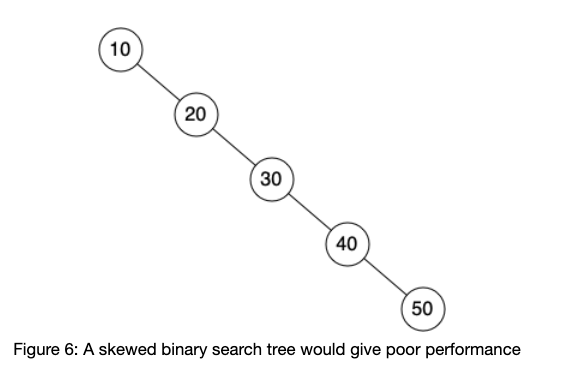

Now that you understand that the performance of the `put` method is limited by the height of the tree, you can probably guess that other methods, `get`, `in`, and `del`, are limited as well. Since `get` searches the tree to find the key, in the worst case the tree is searched all the way to the bottom and no key is found. At first glance `del` might seem more complicated since it may need to search for the successor before the deletion operation can complete. But remember that the worst-case scenario to find the successor is also just the height of the tree which means that you would simply double the work. Since doubling is a constant factor, it does not change worst-case analysis of `O(n)` for an unbalanced tree.

### 6.16 - Balanced Binary Search Trees

In the previous section we looked at building a binary search tree. As we learned, the performance of the binary search tree can degrade to `O(n)` for operations like `get` and `put` when the tree becomes unbalanced. In this section we will look at a special kind of binary search tree that automatically makes sure that the tree remains balanced at all times. This tree is called an ***AVL tree*** and is named for its inventors: G.M. Adelson-Velskii and E.M. Landis.

An AVL tree implements the `Map` abstract data type just like a regular binary search tree; the only difference is in how the tree performs. To implement our AVL tree we need to keep track of a balance factor for each node in the tree. We do this by looking at the heights of the left and right subtrees for each node. More formally, we define the balance factor for a node as the difference between the height of the left subtree and the height of the right subtree.

`balance_factor = height(left_subtree) - height(right_subtree)`

Using the definition for balance factor given above, we say that a subtree is left-heavy if the balance factor is greater than zero. If the balance factor is less than zero, then the subtree is right-heavy. If the balance factor is zero, then the tree is perfectly in balance. For purposes of implementing an AVL tree and gaining the benefit of having a balanced tree, we will define a tree to be in balance if the balance factor is -1, 0, or 1. Once the balance factor of a node in a tree is outside this range we will need to have a procedure to bring the tree back into balance. Figure 1 shows an example of an unbalanced right-heavy tree and the balance factors of each node.

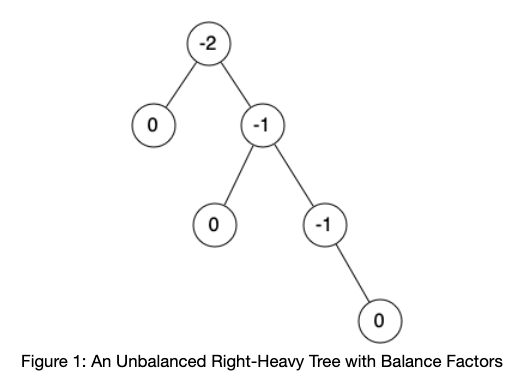

### 6.17 - AVL Tree Performance

Before we proceed any further let’s look at the result of enforcing this new balance factor requirement. Our claim is that by ensuring that a tree always has a balance factor of -1, 0, or 1 we can get better Big-O performance of key operations. Let us start by thinking about how this balance condition changes the worst-case tree. There are two possibilities to consider, a left-heavy tree and a right-heavy tree. If we consider trees of heights 0, 1, 2, and 3, Figure 2 illustrates the most unbalanced left-heavy tree possible under the new rules.

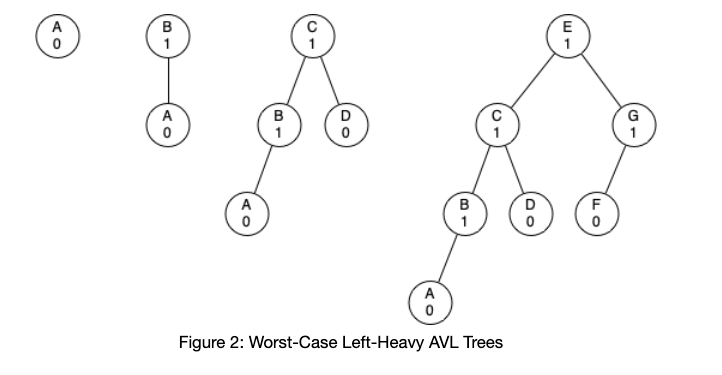

Looking at the total number of nodes in the tree we see that for a tree of height 0 there is 1 node, for a tree of height 1 there is `1+1=2` nodes, for a tree of height 2 there are `1+1+2=4`, and for a tree of height 3 there are `1+2+4=7`. More generally the pattern we see for the number of nodes in a tree of height `h` (`Nh`) is:

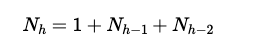

This recurrence may look familiar to you because it is very similar to the Fibonacci sequence. We can use this fact to derive a formula for the height of an AVL tree given the number of nodes in the tree. Recall that for the Fibonacci sequence the ith Fibonacci number is given by:

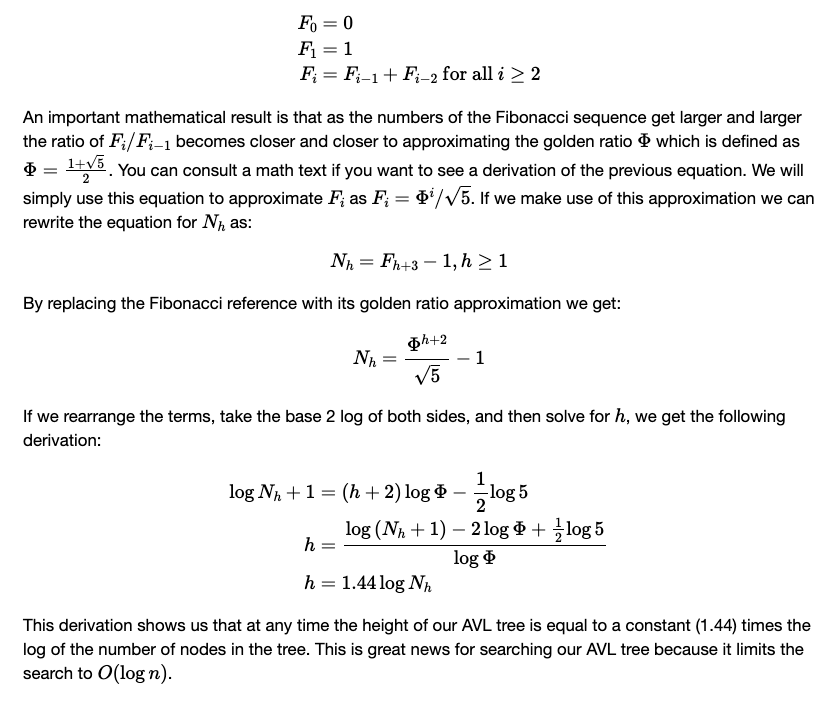

### 6.18 - AVL Tree Implementation

Now that we have demonstrated that keeping an AVL tree in balance is going to be a big performance improvement, let’s look at how we will augment the procedure to insert a new key into the tree. Since all new keys are inserted into the tree as leaf nodes and we know that the balance factor for a new leaf is zero, there are no new requirements for the node that has just been inserted. But once the new leaf is added, we must update the balance factor of its parent. How this new leaf affects the parent’s balance factor depends on whether the leaf node is a left child or a right child. If the new node is a right child, the balance factor of the parent will be reduced by one. If the new node is a left child, then the balance factor of the parent will be increased by one. This rule can be applied recursively to the grandparent of the new node, and possibly to every ancestor, all the way up to the root of the tree. Since this is a recursive procedure, let’s examine the two base cases for updating balance factors:

- The recursive call has reached the root of the tree.

- The balance factor of the parent has been adjusted to zero. You should convince yourself that once a subtree has a balance factor of zero, then the balance of its ancestor nodes does not change.

We will implement the AVL tree as a subclass of `BinarySearchTree`. To begin, we will override the `_put` method and write a new `update_balance` helper method. These methods are shown in Listing 1. You will notice that the definition for `_put` is exactly the same as in simple binary search trees except for the addition of the calls to `update_balance` on lines 9 and 17.

In [ ]:
# Listing 1

def _put(self, key, value, current_node):
    if key < current_node.key:
        if current_node.left_child:
            self._put(key, value, current_node.left_child)
        else:
            current_node.left_child = AVLTreeNode(
                key, value, 0, parent=current_node
            )
            self.update_balance(current_node.left_child)
    else:
        if current_node.right_child:
            self._put(key, value, current_node.right_child)
        else:
            current_node.right_child = AVLTreeNode(
                key, value, 0, parent=current_node
            )
            self.update_balance(current_node.right_child)

def update_balance(self, node):
    if node.balance_factor > 1 or node.balance_factor < -1:
        self.rebalance(node)
        return
    if node.parent:
        if node.is_left_child():
            node.parent.balance_factor += 1
        elif node.is_right_child():
            node.parent.balance_factor -= 1

        if node.parent.balance_factor != 0:
            self.update_balance(node.parent)

The new `update_balance` method is where most of the work is done. This implements the recursive procedure we just described. It first checks to see if the current node is out of balance enough to require rebalancing (line 20). If that is the case then the rebalancing is done and no further updating to parents is required. If the current node does not require rebalancing then the balance factor of the parent is adjusted. If the balance factor of the parent is nonzero then the algorithm continues to work its way up the tree toward the root by recursively calling `update_balance` on the parent.

When a rebalancing of the tree is necessary, how do we do it? Efficient rebalancing is the key to making the AVL Tree work well without sacrificing performance. In order to bring an AVL Tree back into balance, we will perform one or more ***rotations*** on the tree.

To understand what a rotation is, let’s look at a very simple example. Consider the tree in the left half of Figure 3. This tree is out of balance with a balance factor of -2. To bring this tree into balance we will use a left rotation around the subtree rooted at node A.

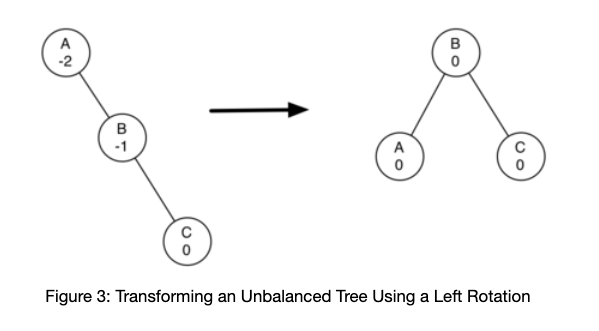

To perform a left rotation we essentially do the following:

1. Promote the right child (B) to be the root of the subtree.

2. Move the old root (A) to be the left child of the new root.

3. If new root (B) already has a left child, then make it the right child of the new left child (A). Note: since the new root (B) was the right child of A, the right child of A is guaranteed to be empty at this point. This allows us to add a new node as the right child without any further consideration.

While this procedure is fairly easy in concept, the details of the code are a bit tricky since we need to move things around in just the right order so that all properties of a binary search tree are preserved. Furthermore, we need to make sure to update all of the parent pointers appropriately.

Let’s look at a slightly more complicated tree to illustrate the right rotation. The left side of Figure 4 shows a tree that is left-heavy and with a balance factor of 2 at the root.

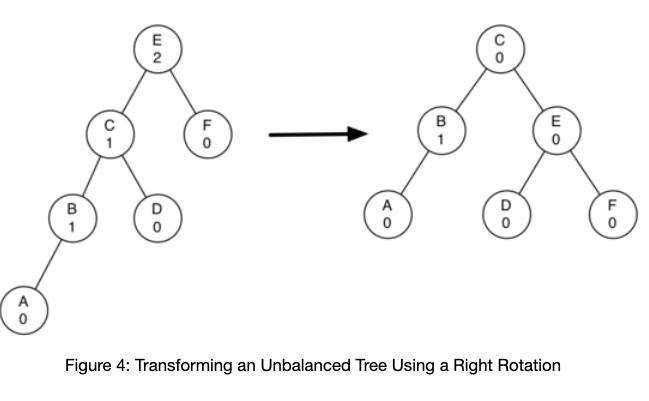

To perform a right rotation we essentially do the following:

1. Promote the left child (C) to be the root of the subtree.

2. Move the old root (E) to be the right child of the new root.

3. If the new root (C) already has a right child (D) then make it the left child of the new right child (E). Note: since the new root (C) was the left child of E, the left child of E is guaranteed to be empty at this point. This allows us to add a new node as the left child without any further consideration.

Now that you have seen the rotations and have the basic idea of how a rotation works let us look at the code. Listing 2 shows the code for the left rotation (the `rotate_right` method is symmetrical to `rotate_left` so we will leave it to you to study the code for `rotate_right`). In line 2 we create a temporary variable to keep track of the new root of the subtree. As we said before, the new root is the right child of the previous root. Now that a reference to the right child has been stored in this temporary variable, we replace the right child of the old root with the left child of the new.

The next step is to adjust the parent pointers of the two nodes. If `new_root` has a left child then the new parent of the left child becomes the old root. The parent of the new root is set to the parent of the old root. If the old root was the root of the entire tree then we must set the root of the tree to point to this new root. Otherwise, if the old root is a left child then we change the parent of the left child to point to the new root; otherwise we change the parent of the right child to point to the new root. (lines 10-13). Finally we set the parent of the old root to be the new root. This is a lot of complicated bookkeeping, so we encourage you to trace through this function while looking at Figure 3.

In [ ]:
# Listing 2

def rotate_left(self, rotation_root):
    new_root = rotation_root.right_child
    rotation_root.right_child = new_root.left_child
    if new_root.left_child:
        new_root.left_child.parent = rotation_root
    new_root.parent = rotation_root.parent
    if rotation_root.is_root():
        self._root = new_root
    else:
        if rotation_root.is_left_child():
            rotation_root.parent.left_child = new_root
        else:
            rotation_root.parent.right_child = new_root
    new_root.left_child = rotation_root
    rotation_root.parent = new_root
    
    # lines 16-21 follow
    
    rotation_root.balance_factor = (
        rotation_root.balance_factor + 1 - min(new_root.balance_factor, 0)
    )
    new_root.balance_factor = (
        new_root.balance_factor + 1 + max(rotation_root.balance_factor, 0)
    )

Finally, lines 16-21 require some explanation. In these lines we update the balance factors of the old and the new root. Since all the other moves involve moving entire subtrees, the balance factors of all other nodes are unaffected by the rotation. But how can we update the balance factors without completely recalculating the heights of the new subtrees? Figure 5 and the following derivation should convince you that these lines are correct.

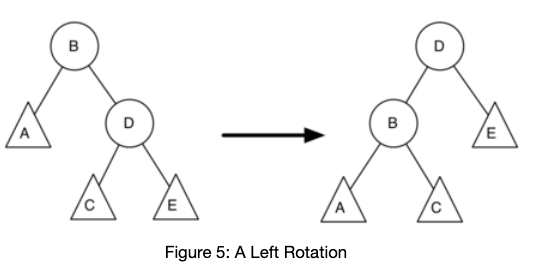

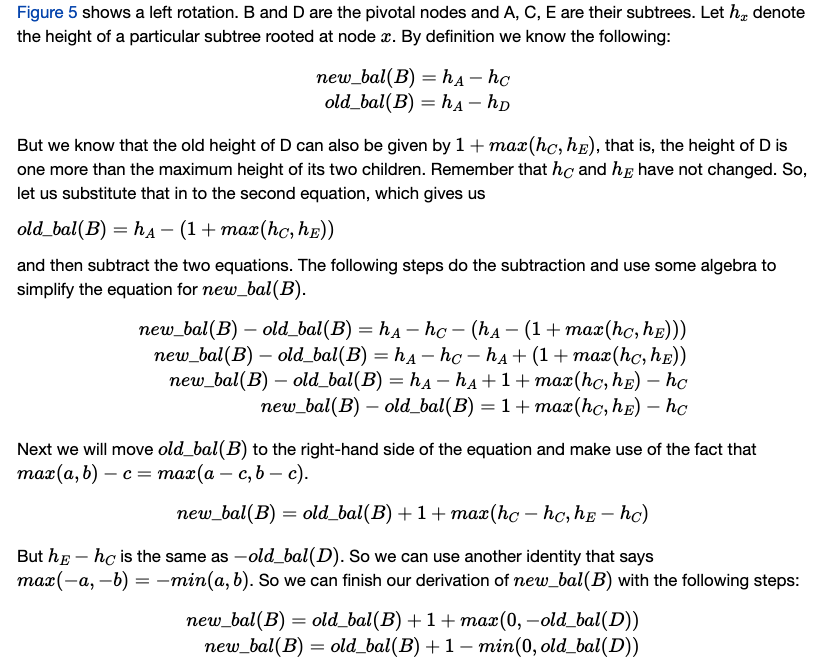

Now we have all of the parts in terms that we readily know. If we remember that B is `rotation_root` and D is `new_root` then we can see this corresponds exactly to the statement on lines 16-18 in Listing 2, or:

```
rotation_root.balance_factor = (
    rotation_root.balance_factor + 1 - min(new_root.balance_factor, 0)
)
```

A similar derivation gives us the equation for the updated node D as well as the balance factors after a right rotation. We leave these as an exercise for you.

Now you might think that we are done. We know how to do our left and right rotations, and we know when we should do a left or right rotation. But take a look at Figure 6. Since node A has a balance factor of -2 we should do a left rotation. But what happens when we do the left rotation around A?

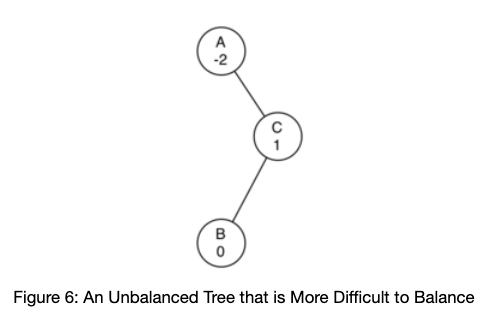

Figure 7 shows us that after the left rotation we are now out of balance the other way. If we do a right rotation to correct the situation we are right back where we started.

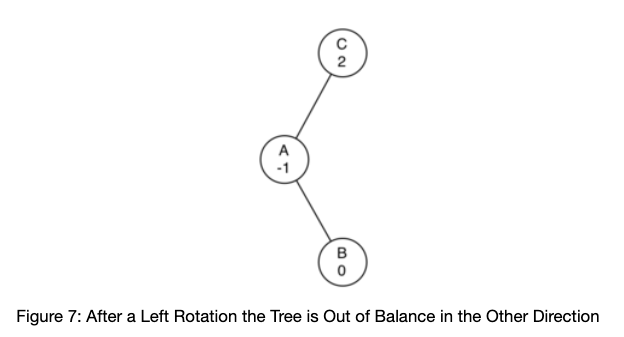

To correct this problem we must use the following set of rules:

1. If a subtree needs a left rotation to bring it into balance, first check the balance factor of the right child. If the right child is left-heavy, then do a right rotation on right child followed by the original left rotation.

2. If a subtree needs a right rotation to bring it into balance, first check the balance factor of the left child. If the left child is right-heavy, then do a left rotation on the left child followed by the original right rotation.

Figure 8 shows how these rules solve the dilemma we encountered in Figure 6 and Figure 7. Starting with a right rotation around node C puts the tree in a position where the left rotation around A brings the entire subtree back into balance.

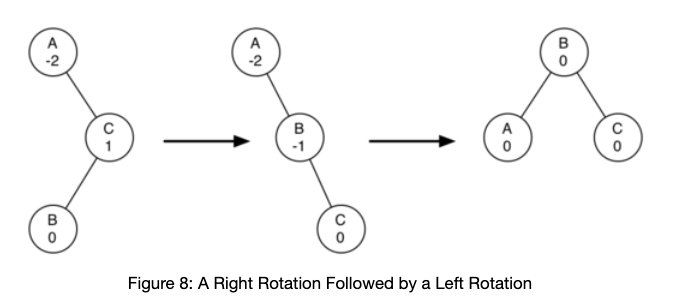

The code that implements these rules can be found in our `rebalance` method, which is shown in Listing 3. Rule number 1 from above is implemented by the `if` statement starting on line 2. Rule number 2 is implemented by the `elif` statement starting on line 8.

In [ ]:
# Listing 3

def rebalance(self, node):

    if node.balance_factor < 0:
        if node.right_child.balance_factor > 0:
            self.rotate_right(node.right_child)
            self.rotate_left(node)
        else:
            self.rotate_left(node)

    elif node.balance_factor > 0:
        if node.left_child.balance_factor < 0:
            self.rotate_left(node.left_child)
            self.rotate_right(node)
        else:
            self.rotate_right(node)

The discussion questions provide you the opportunity to rebalance a tree that requires a left rotation followed by a right. In addition the discussion questions provide you with the opportunity to rebalance some trees that are a little more complex than the tree in Figure 8.

By keeping the tree in balance at all times, we can ensure that the `get` method will run in order `O(log2(n))` time. But the question is at what cost to our `put` method? Let us break this down into the operations performed by `put`. Since a new node is inserted as a leaf, updating the balance factors of all the parents will require a maximum of operations, one for each level of the tree. If a subtree is found to be out of balance, a maximum of two rotations are required to bring the tree back into balance. But each of the rotations works in `O(1)` time, so even our `put` operation remains `O(log2(n))`.

At this point we have implemented a functional AVL tree, unless you need the ability to delete a node. We leave the deletion of the node and subsequent updating and rebalancing as an exercise for you.

### 6.19 - Summary of Map ADT Implementations

Over the past two chapters we have looked at several data structures that can be used to implement the map abstract data type: a binary search on a list, a hash table, a binary search tree, and a balanced binary search tree. To conclude this section, let’s summarize the performance of each data structure for the key operations defined by the map ADT (see Table 1).

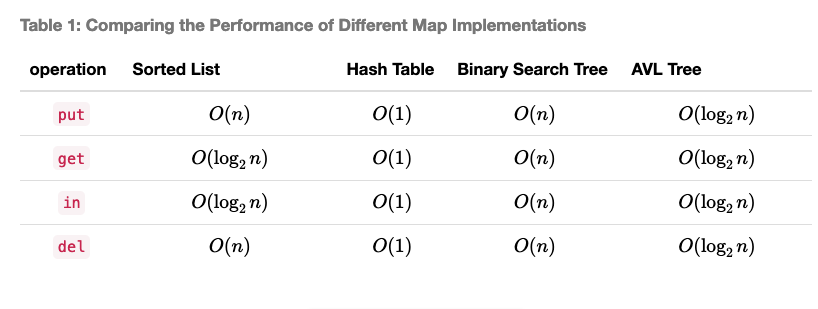

### 6.20 - Summary

In this chapter we have looked at the tree data structure, which enables us to write many interesting algorithms. We have looked at algorithms that use various kinds of trees to do the following:

- A binary tree for parsing and evaluating expressions.

- A binary tree for implementing the map ADT.

- A balanced binary tree (AVL tree) for implementing the map ADT.

- A binary tree to implement a min heap.

- A min heap used to implement a priority queue.

### 6.21 - Key Terms

- AVL tree
	
- height
	
- postorder traversal

- balance factor
	
- inorder traversal
	
- preorder traversal

- binary heap
	
- leaf node
	
- priority queue

- binary search tree
	
- level
	
- root

- binary tree
	
- map
	
- rotation

- BST property
	
- min/max heap
	
- sibling

- child / children
	
- node
	
- subtree

- complete binary tree
	
- parent
	
- successor

- edge
	
- parse tree
	
- tree

- heap order property
	
- path
	
- tree traversal

### 6.22 - Programming Exercises

1. Draw the tree structure resulting from the following set of tree function calls:

```
r = BinaryTree(3)

insert_left(r, 4)
[3, [4, [], []], []]

insert_left(r, 5)
[3, [5, [4, [], []], []], []]

insert_right(r, 6)
[3, [5, [4, [], []], []], [6, [], []]]

insert_right(r, 7)
[3, [5, [4, [], []], []], [7, [], [6, [], []]]]

set_root_val(r, 9)

insert_left(r, 11)
[9, [11, [5, [4, [], []], []], []], [7, [], [6, [], []]]]
```

2. Trace the algorithm for creating an expression tree for the expression (4*8)/6-3.

3. Consider the following list of integers: `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`. Show the binary search tree resulting from inserting the integers in the list.

4. Consider the following list of integers: `[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]`. Show the binary search tree resulting from inserting the integers in the list.

5. Generate a random list of integers. Show the binary heap tree resulting from inserting the integers on the list one at a time.

6. Using the list from the previous question, show the binary heap tree resulting from using the list as a parameter to the `heapify` method. Show both the tree and list form.

7. Draw the binary search tree that results from inserting the following keys in the order given: `68, 88, 61, 89, 94, 50, 4, 76, 66, and 82`.

8. Generate a random list of integers. Draw the binary search tree resulting from inserting the integers on the list.

9. Consider the following list of integers: `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`. Show the binary heap resulting from inserting the integers one at a time.

10. Consider the following list of integers: `[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]`. Show the binary heap resulting from inserting the integers one at a time.

11. Consider the two different techniques we used for implementing traversals of a binary tree. Why must we check before the call to preorder when implementing it as a method, whereas we could check inside the call when implementing it as a function?

12. Show the function calls needed to build the following binary tree.

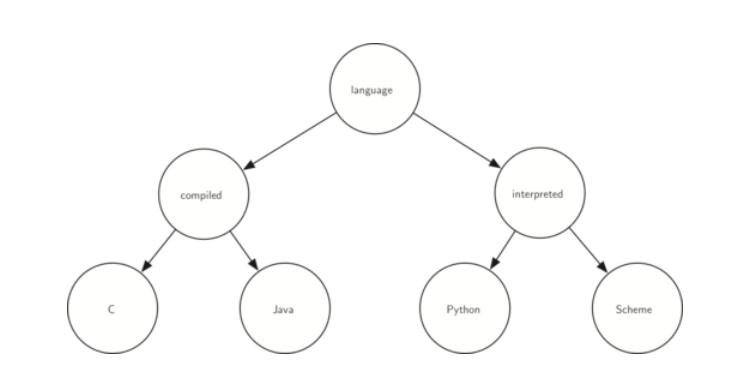

13. Given the following tree, perform the appropriate rotations to bring it back into balance.

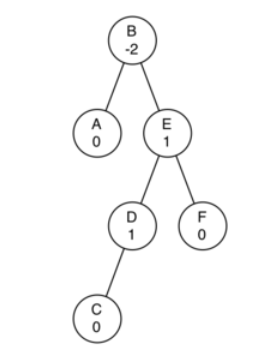

14. Using the following as a starting point, derive the equation that gives the updated balance factor for node D.

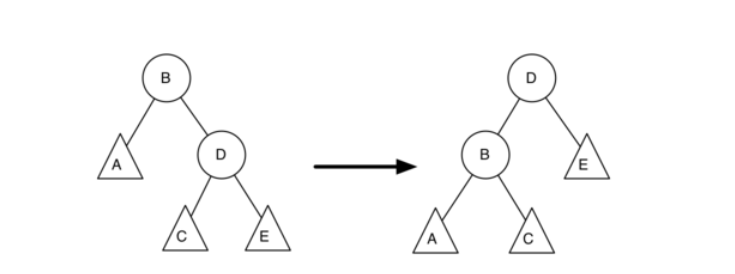

15. Extend the `build_parse_tree` function to handle mathematical expressions that do not have spaces between every character.

16. Modify the `build_parse_tree` and evaluate functions to handle Boolean statements (`and`, `or`, and `not`). Remember that `not` is a unary operator, so this will complicate your code somewhat.

17. Using the `find_successor` method, write a non-recursive inorder traversal for a binary search tree.

18. A threaded binary tree maintains a reference from each node to its successor. Modify the code for a binary search tree to make it threaded, then write a non-recursive inorder traversal method for the threaded binary search tree.

19. Modify our implementation of the binary search tree so that it handles duplicate keys properly. That is, if a key is already in the tree then the new payload should replace the old rather than add another node with the same key.

20. Create a binary heap with a limited heap size. In other words, the heap only keeps track of the `n` most important items. If the heap grows in size to more than `n` items the least important item is dropped.

21. Clean up the `print_exp` function so that it does not include an extra set of parentheses around each number.

22. Using the `heapify` method, write a sorting function that can sort a list in `O(n*log(n))` time.

23. Write a function that takes a parse tree for a mathematical expression and calculates the derivative of the expression with respect to some variable.

24. Implement a binary heap as a max heap.

25. Using the `BinaryHeap` class, implement a new class called `PriorityQueue`. Your `PriorityQueue` class should implement the constructor plus the `enqueue` and `dequeue` methods.

26. Implement the `delete` method for an AVL tree.